# **Anticipez les besoins en consommation de bâtiments**

---



Mission :    
      Aider la ville de Seattle pour atteindre son objectif de ville neutre en émissions de carbone en 2050

Nous allons y proceder en 3 grandes etapes:


1.   NoteBook 1 : Chargement, analyse des données ainsi que features Engineering.
2.   NoteBook 2 : Choix de modèle pour notre Target 1 (consommation energie)
3.   NoteBook 3 : Choix de modèle pour notre Target 2 (émission CO2)






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Therminology


*   **sf** : square footage
*   **Btu** : signifie une unité thermique britannique et est la quantité de chaleur nécessaire pour élever la température d'une (1) livre d'eau de 1° Fahrenheit à 60° Fahrenheit.
*   **kBtu / sf** : signifie mille unités thermiques britanniques , une unité commune de mesure de l'énergie utilisée pour convertir et combiner d'autres mesures d'énergie telles que les kilowattheures ( kWh) d' électricité , les therms du gaz naturel et les livres de vapeur .
*   **therms** :Unité de mesure d’énergie anglo-saxonne, valant 100 000 BTU ou environ 105,5 mégajoules
*   **WN** : Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques
*   **EUI**: Energy Use Intensity , energy per sf per year
*   **EPA**: Environmental Protection Agency
*   **GFA** :Gross floor area est égale à la somme des surfaces de chaque niveau, des surfaces des toitures-terrasses, des balcons ou loggias et des surfaces non closes situées au rez-de-chaussée, y compris l’épaisseur des murs et des cloisons



# **1. Chargement, analyse et nettoyage**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msn
import scipy.stats as stats
import missingno as msn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option("display.max_columns", 100)

In [ ]:
# On upload les données
data=pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/2016_Building_Energy_Benchmarking.csv", sep = ',')

In [ ]:
#On affiche quelques lignes pour voie a quoi ressemble notre dataset
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [ ]:
data.shape

(3376, 46)

Nous avons un dataset de 3376 lignes et 46 colonnes

In [ ]:
#données statistiques
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [ ]:
#Somme des valeurs manquantes
data.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


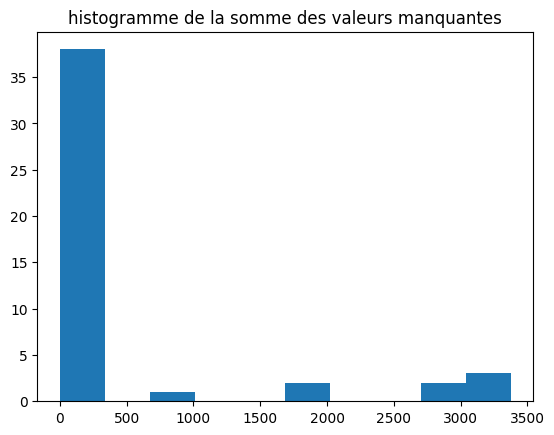

In [ ]:
plt.hist(data.isnull().sum())
plt.title('histogramme de la somme des valeurs manquantes')
plot=plt.show()

<Axes: >

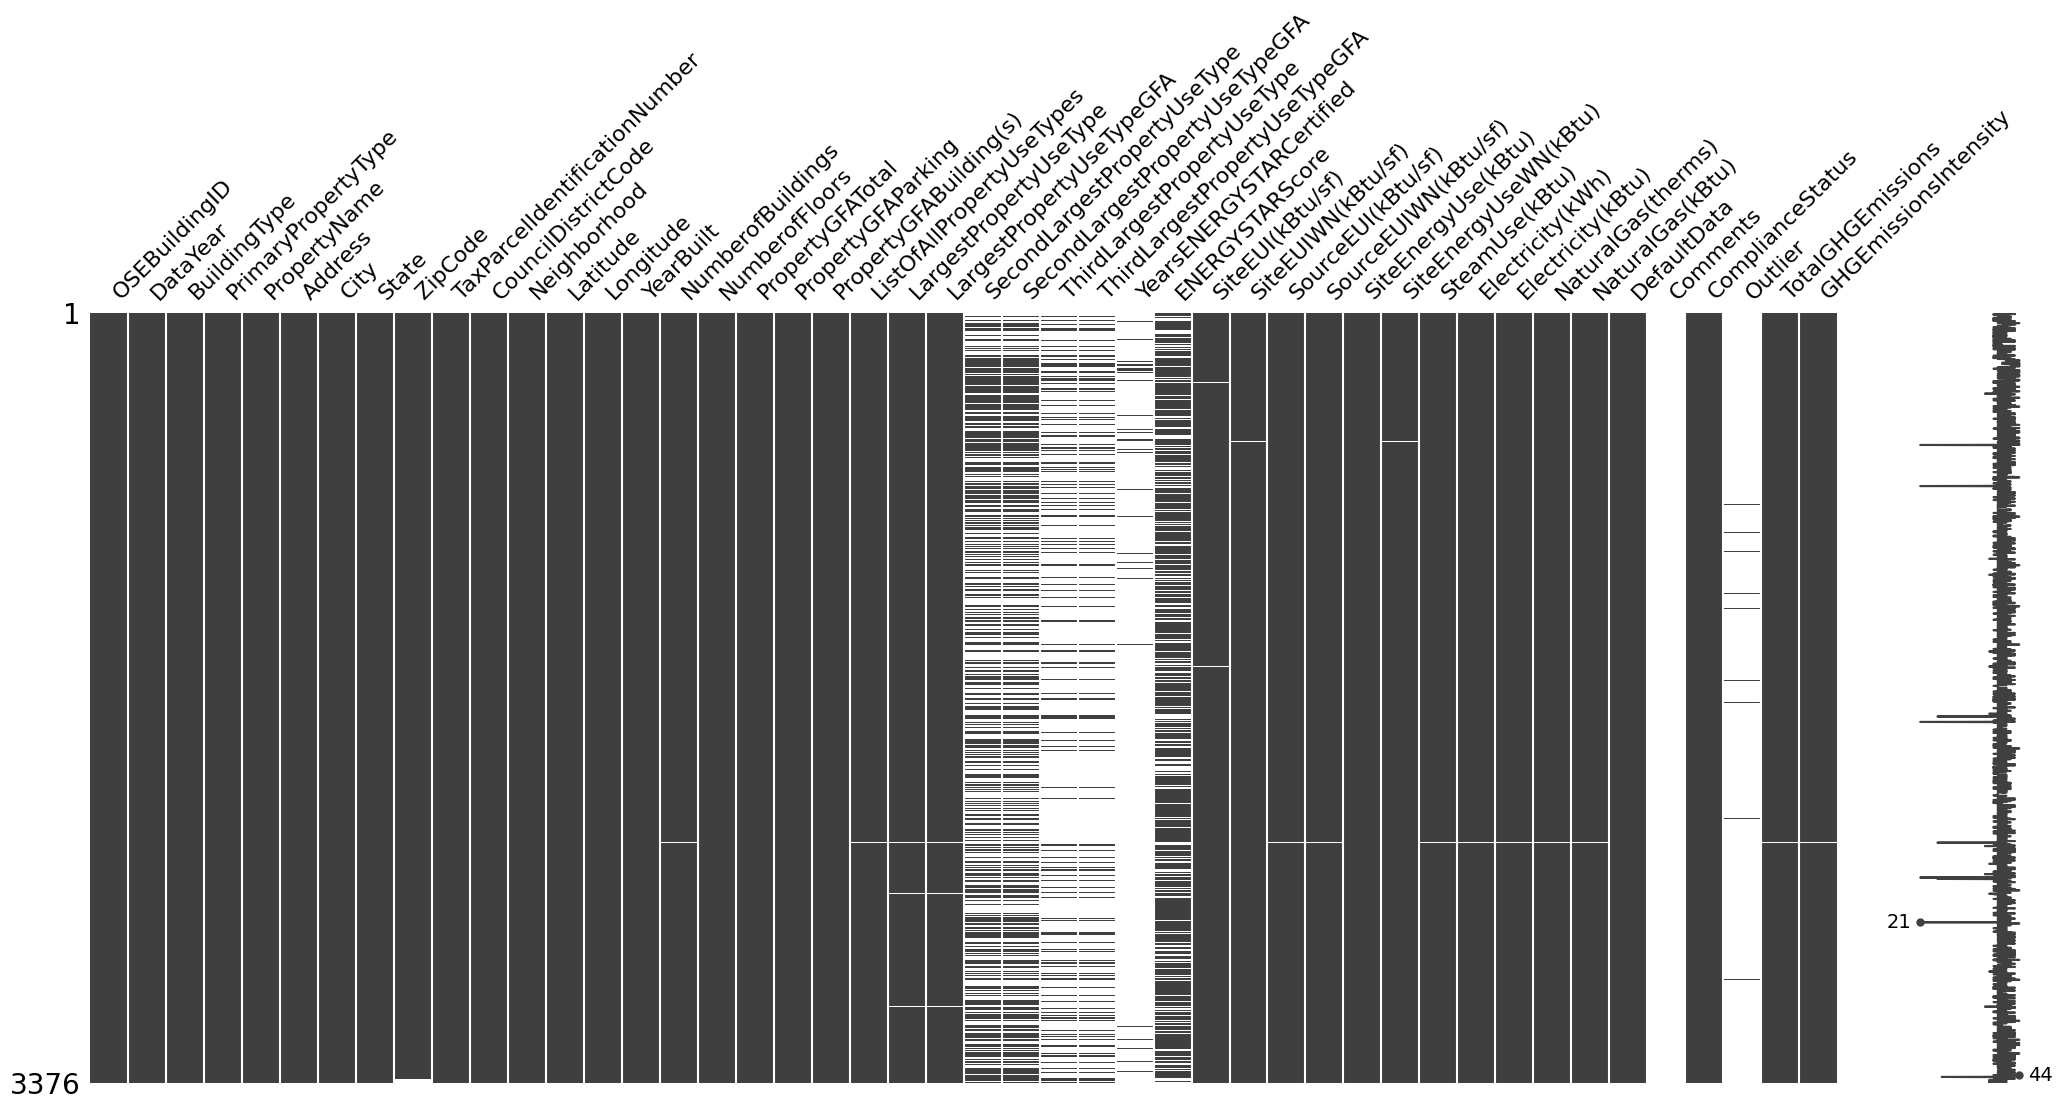

In [ ]:
msn.matrix(data)

In [ ]:
#Somme des valeurs manquantes
data.isnull().mean().round(2) #on arrondit

OSEBuildingID                      0.00
DataYear                           0.00
BuildingType                       0.00
PrimaryPropertyType                0.00
PropertyName                       0.00
Address                            0.00
City                               0.00
State                              0.00
ZipCode                            0.00
TaxParcelIdentificationNumber      0.00
CouncilDistrictCode                0.00
Neighborhood                       0.00
Latitude                           0.00
Longitude                          0.00
YearBuilt                          0.00
NumberofBuildings                  0.00
NumberofFloors                     0.00
PropertyGFATotal                   0.00
PropertyGFAParking                 0.00
PropertyGFABuilding(s)             0.00
ListOfAllPropertyUseTypes          0.00
LargestPropertyUseType             0.01
LargestPropertyUseTypeGFA          0.01
SecondLargestPropertyUseType       0.50
SecondLargestPropertyUseTypeGFA    0.50


In [ ]:
# Moyenne des valeurs dupliquées
data.duplicated().mean()

0.0

Nous n'avons pas de valeurs duppliquées

Nous commencçons un premier  traitement des features .
Pour notre mission nous avons besoin d'étudier les batiments non residentiels.
Verifions:

In [ ]:
data['OSEBuildingID'].duplicated().sum()

0

In [ ]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [ ]:
pie_buildingtype= data[data['BuildingType'].isin(data['BuildingType'].value_counts(ascending=False).index[:20])]
print(pie_buildingtype['BuildingType'].value_counts().reset_index())
px.pie(pie_buildingtype['BuildingType'].value_counts().reset_index(),
      values=pie_buildingtype['BuildingType'].value_counts().reset_index()['BuildingType'],
      names=pie_buildingtype['BuildingType'].value_counts().index,
      hole=0.3)


                  index  BuildingType
0        NonResidential          1460
1  Multifamily LR (1-4)          1018
2  Multifamily MR (5-9)           580
3  Multifamily HR (10+)           110
4     SPS-District K-12            98
5    Nonresidential COS            85
6                Campus            24
7     Nonresidential WA             1


In [ ]:
data['City'].unique()

array(['Seattle'], dtype=object)

In [ ]:
data['State'].unique()

array(['WA'], dtype=object)

In [ ]:
data['DataYear'].unique()

array([2016])

In [ ]:
data['YearsENERGYSTARCertified'].describe()

count      119
unique      65
top       2016
freq        14
Name: YearsENERGYSTARCertified, dtype: object

In [ ]:
data['YearsENERGYSTARCertified'].unique()

array([nan, '2016', '2014', '2012', '20172015',
       '2017201620152014201320122011201020092008', '201020092007',
       '201720102007', '20162015', '20152014201220112009', '201220092008',
       '201620152014201320112010200920072000', '201620092008',
       '201620142012', '20162015201420122008',
       '2016201520142013201220112010200920082007200620052004',
       '201520142013', '2014201320112010200920082007', '2016201520142013',
       '2017201620152014201320112008', '201720162015201420132008',
       '20162015201320122010', '2015201320122010', '20162011201020092008',
       '2007', '2010', '20172016201520092008', '2017201320092008', '2015',
       '2017', '2017201120102007', '201720162014201320122011201020092007',
       '201720152014201220102008', '20092005', '2017201520142013',
       '201620152012', '2012201020072006', '20112009', '2009',
       '201620152014201320092008', '201620152014201320112009',
       '2016201520142013201220112010', '201720162012', '20102008',
       '20

In [ ]:
data['Comments'].unique()

array([nan])

In [ ]:
data['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [ ]:
not_compliant = ['Error - Correct Default Data', 'Missing Data', 'Non-Compliant'  ]

In [ ]:
data = data [~data['ComplianceStatus'].isin(not_compliant)]

In [ ]:
data['ComplianceStatus'].unique()

array(['Compliant'], dtype=object)

In [ ]:
data.Outlier.unique()

array([nan], dtype=object)

In [ ]:
data.shape

(3211, 46)

In [ ]:
data.DefaultData.unique()

array([False])

In [ ]:
colonne_a_supprimer = ['City','State','TaxParcelIdentificationNumber','CouncilDistrictCode','DataYear', 'Comments','YearsENERGYSTARCertified','DefaultData', 'ComplianceStatus', 'Outlier']
for x in colonne_a_supprimer:
  del data[x]

In [ ]:
data.shape

(3211, 36)

<Axes: >

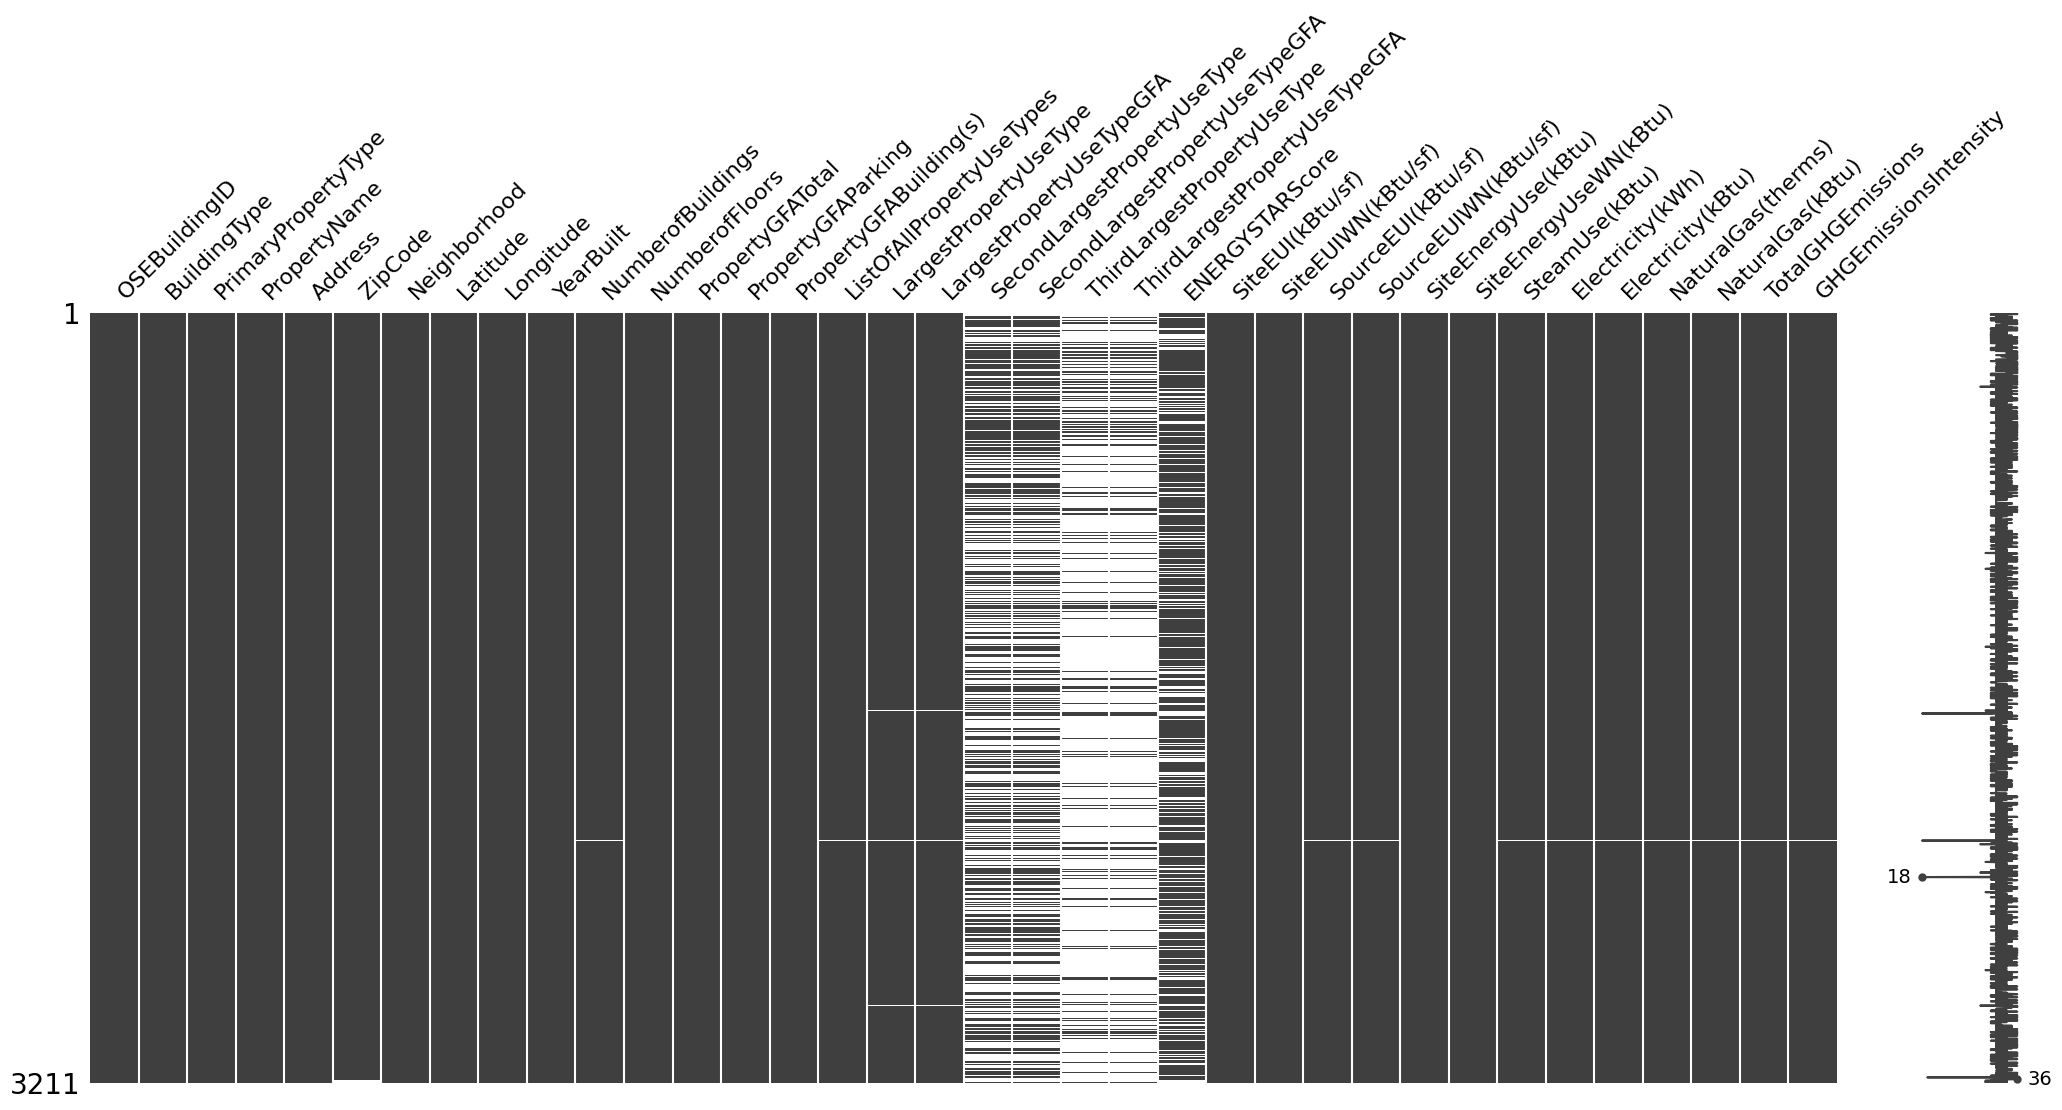

In [ ]:
msn.matrix(data)

In [ ]:
data['Address'].nunique()

3189

In [ ]:
data['Address'].isnull().sum()

0

In [ ]:
data['Address'].duplicated().sum()

22

In [ ]:
data[data['Address'].duplicated()]

OSEBuildingID          BuildingType          PrimaryPropertyType  \
136             224        NonResidential                 Retail Store   
157             248    Nonresidential COS                    Warehouse   
349             491        NonResidential  Small- and Mid-Sized Office   
582             779        NonResidential                 Large Office   
587             785    Nonresidential COS                        Other   
697           19654        NonResidential                   Laboratory   
1436          21794        NonResidential                  K-12 School   
1923          23835        NonResidential  Small- and Mid-Sized Office   
1969          23975    Nonresidential COS                    Warehouse   
1970          23976    Nonresidential COS           Mixed Use Property   
2123          24537        NonResidential                    Warehouse   
2124          24538        NonResidential                    Warehouse   
2125          24539        NonResidential                    Warehouse   
2149          24601        NonResidential  Small- and Mid-Sized Office   
2162          24636        NonResidential                 Retail Store   
2163          24640        NonResidential                 Retail Store   
2236          24896        NonResidential                 Retail Store   
2879          27301  Multifamily LR (1-4)         Low-Rise Multifamily   
3160          49687        NonResidential  Supermarket / Grocery Store   
3230          49850        NonResidential                  K-12 School   
3232          49862    Nonresidential COS                        Other   
3360          50196    Nonresidential COS           Mixed Use Property   

                              PropertyName                       Address  \
136          Westwood Village - Building B             2600 SW Barton St   
157                     SCL SSC Building B                3613 4th Ave S   
349                            South Tower             100 West Harrison   
582                Administration Building                   500 5TH AVE   
587               Airport Way Ctr - Bldg A            2203 Airport Way S   
697                         1100 Olive Lab                1100 Olive Way   
1436                                Peyton            2400 11th Ave East   
1923  South Seattle Business Park - Bldg B  4636 East Marginal Way South   
1969              Airport Way Ctr - Bldg D            2203 Airport Way S   
1970              Airport Way Ctr - Bldg E            2203 Airport Way S   
2123   Cloverdale Business Park Building B   309 South Cloverdale Street   
2124   Cloverdale Business Park Building C   309 South Cloverdale Street   
2125   Cloverdale Business Park Building E   309 South Cloverdale Street   
2149                    Navos Erlick Perez             2600 SW Holden St   
2162         Westwood Village - Building E             2600 SW Barton St   
2163         Westwood Village - Building F             2600 SW Barton St   
2236                     Promenade South 2             2309 S Jackson St   
2879               Executive Estates F,G,H          1227 NE 143rd Street   
3160                Safeway 1885 - 1st Ave                 516 1st Ave W   
3230          Paul G Allen Athletic Center              14050 1st Ave NE   
3232                SCT Technical Pavilion                201 Thomas St.   
3360            Northgate Community Center              10510 5th Ave NE   

      ZipCode           Neighborhood  Latitude  Longitude  YearBuilt  \
136   98126.0               DELRIDGE  47.52254 -122.36627       1965   
157   98134.0       GREATER DUWAMISH  47.57199 -122.32811       1965   
349   98119.0  MAGNOLIA / QUEEN ANNE  47.62224 -122.35850       1970   
582   98104.0               DOWNTOWN  47.60290 -122.32927       1971   
587   98134.0       GREATER DUWAMISH  47.58290 -122.32417       1944   
697   98101.0               DOWNTOWN  47.61597 -122.33086       1946   
1436  98102.0                   EAST  47.64132 -12

In [ ]:
data['ZipCode'].nunique()

55

In [ ]:
pie_Neighborhood= data[data['ZipCode'].isin(data['ZipCode'].value_counts(ascending=False).index[:20])]
print(pie_Neighborhood['ZipCode'].value_counts().reset_index())
px.pie(pie_Neighborhood['ZipCode'].value_counts().reset_index(),
      values=pie_Neighborhood['ZipCode'].value_counts().reset_index()['ZipCode'],
      names=pie_Neighborhood['ZipCode'].value_counts().index,
      hole=0.3)

      index  ZipCode
0   98109.0      291
1   98104.0      243
2   98122.0      234
3   98101.0      223
4   98134.0      184
5   98105.0      183
6   98121.0      182
7   98102.0      164
8   98119.0      163
9   98103.0      152
10  98125.0      142
11  98108.0      120
12  98133.0      118
13  98115.0      118
14  98107.0       99
15  98144.0       90
16  98116.0       81
17  98118.0       69
18  98199.0       68
19  98112.0       62


In [ ]:
data['ZipCode'].isnull().sum()

13

Même si nous avons des valeurs manquantes cela n'impactera pas notre analyse. nous avons les adresses, les coordoonnées GPS, les quartiers ...

In [ ]:
data[data['PropertyName'].duplicated()]

OSEBuildingID          BuildingType          PrimaryPropertyType  \
1324          21526  Multifamily LR (1-4)         Low-Rise Multifamily   
1462          21893        NonResidential                    Warehouse   
1556          22418  Multifamily LR (1-4)         Low-Rise Multifamily   
1566          22486        NonResidential  Small- and Mid-Sized Office   
1644          22956  Multifamily LR (1-4)        Senior Care Community   
1800          23451  Multifamily MR (5-9)         Mid-Rise Multifamily   
1965          23963        NonResidential                    Warehouse   
1968          23971        NonResidential       Refrigerated Warehouse   
2081          24391  Multifamily LR (1-4)         Low-Rise Multifamily   
2367          25418  Multifamily LR (1-4)         Low-Rise Multifamily   
2609          26240  Multifamily LR (1-4)         Low-Rise Multifamily   
2966          27681  Multifamily LR (1-4)         Low-Rise Multifamily   
3266          49944  Multifamily MR (5-9)           Mixed Use Property   

                    PropertyName                 Address  ZipCode  \
1324                    Lakeview    1555 Lakeview Blvd E  98102.0   
1462                  South Park         9125 10th Ave S  98108.0   
1556                Central Park      1819 NW Central Pl  98107.0   
1566              Canal Building         3600 15th Ave W  98119.0   
1644             Northgate Plaza        11030 5th Ave NE  98125.0   
1800                    Fairview   1000 Queen Anne Ave N  98109.0   
1965            Bayview Building      923 S. Bayview St.  98134.0   
1968                 Airport Way  2415 Airport Way South  98134.0   
2081  Jefferson Court Apartments   10301 Greenwood Ave N  98133.0   
2367                    Parkside          620 19th Ave E  98112.0   
2609             Northgate Plaza         9416 1st Ave NE  98115.0   
2966        Crestview Apartments   2701 West Manor Place  98199.0   
3266               Pine Building       1535 First Avenue  98101.0   

               Neighborhood  Latitude  Longitude  YearBuilt  \
1324                   EAST  47.63364 -122.32271       1949   
1462       GREATER DUWAMISH  47.52130 -122.32182       1979   
1556                BALLARD  47.66662 -122.38034       1960   
1566  MAGNOLIA / QUEEN ANNE  47.65252 -122.37587       1982   
1644                  North  47.70973 -122.32269       1992   
1800  MAGNOLIA / QUEEN ANNE  47.62828 -122.35635       1962   
1965       GREATER DUWAMISH  47.58082 -122.32031       1936   
1968       GREATER DUWAMISH  47.58118 -122.32211       1955   
2081              NORTHWEST  47.70384 -122.35581       1987   
2367                Central  47.62493 -122.30700       1907   
2609                  NORTH  47.69750 -122.32761       1979   
2966  MAGNOLIA / QUEEN ANNE  47.65273 -122.39162       1968   
3266               DOWNTOWN  47.60947 -122.34107       1983   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1324                1.0               3             21112                   0   
1462                1.0               1             31600                   0   
1556                1.0               4             24948                   0   
1566                1.0               3             25859                   0   
1644                1.0               4             94711                   0   
1800                1.0               5             29454                   0   
1965                1.0               1             38630                   0   
1968                1.0               1             25375                   0   
2081                1.0               4             70094                   0   
2367                1.0               2             20736                   0   
2609                1.0               4             99893                   0   
2966                1.0               4             25959                   0   
3266                1.0               5             66460         

In [ ]:
data['PropertyName'].duplicated().sum()

13

In [ ]:
data['PropertyName'].isnull().sum()

0

In [ ]:
data['PropertyName'].unique()

array(['Mayflower park hotel', 'Paramount Hotel',
       '5673-The Westin Seattle', ..., 'Queen Anne Pool',
       'South Park Community Center', 'Van Asselt Community Center'],
      dtype=object)

In [ ]:
data['PropertyName'].nunique()

3198

In [ ]:
data.shape

(3211, 36)

In [ ]:
data.describe()

OSEBuildingID       ZipCode     Latitude    Longitude    YearBuilt  \
count    3211.000000   3198.000000  3211.000000  3211.000000  3211.000000   
mean    21414.844285  98116.896498    47.624544  -122.335136  1968.739645   
std     12141.860393     18.739649     0.047004     0.026574    33.163544   
min         1.000000  98006.000000    47.502240  -122.414250  1900.000000   
25%     20072.500000  98105.000000    47.601050  -122.350425  1948.000000   
50%     23170.000000  98115.000000    47.618910  -122.332630  1975.000000   
75%     26010.500000  98122.000000    47.656745  -122.320200  1997.000000   
max     50226.000000  98272.000000    47.733870  -122.260280  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        3208.000000     3211.000000      3.211000e+03   
mean            1.110973        4.804734      9.579423e+04   
std             2.158983        5.591453      2.227902e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        2.000000      2.830000e+04   
50%             1.000000        4.000000      4.379400e+04   
75%             1.000000        5.000000      9.154000e+04   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         3211.000000            3.211000e+03               3.196000e+03   
mean          8363.015883            8.743122e+04               7.945189e+04   
std          33090.184050            2.115593e+05               2.055745e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.756350e+04               2.498950e+04   
50%              0.000000            4.281600e+04               3.900000e+04   
75%              0.000000            8.449850e+04               7.676675e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1647.000000                      583.000000   
mean                      28235.887248                    11865.633617   
std                       52296.359208                    29623.952143   
min                           0.000000                        0.000000   
25%                        5000.000000                     2299.000000   
50%                       10800.000000                     5149.000000   
75%                       26770.000000                    10280.000000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2399.000000       3211.000000         3210.000000   
mean         67.253022         55.624229           57.950062   
std          26.964851         56.722463           57.615619   
min           1.000000          1.400000            0.000000   
25%          52.000000         28.100000           29.500000   
50%          74.000000         39.299999           41.400002   
75%          89.000000         61.500000           65.475000   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3207.000000           3207.000000         3.211000e+03   
mean           136.583536            140.104615         5.533766e+06   
std            139.761916            139.521632         2.211048e+07   
min              0.000000             -2.100000         5.713320e+04   
25%             75.549999             79.199997         9.368353e+05   
50%             97.699997            102.900002         1.808401e+06   
75%            146.600006            151.100006         4.266934e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.210000e+03    3.207000e+03      3.207000e+03   
mean    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3211 entries, 0 to 3375
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3211 non-null   int64  
 1   BuildingType                     3211 non-null   object 
 2   PrimaryPropertyType              3211 non-null   object 
 3   PropertyName                     3211 non-null   object 
 4   Address                          3211 non-null   object 
 5   ZipCode                          3198 non-null   float64
 6   Neighborhood                     3211 non-null   object 
 7   Latitude                         3211 non-null   float64
 8   Longitude                        3211 non-null   float64
 9   YearBuilt                        3211 non-null   int64  
 10  NumberofBuildings                3208 non-null   float64
 11  NumberofFloors                   3211 non-null   int64  
 12  PropertyGFATotal    

In [ ]:
#on enregistre ce dataset nettoyé
data.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/data.csv', index=False,header=True)

# **2. Feature Engineering**

## 2.1 Categorical Features

In [ ]:
# On upload les données
df=pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/data.csv")

In [ ]:
df.head(2)

OSEBuildingID    BuildingType PrimaryPropertyType          PropertyName  \
0              1  NonResidential               Hotel  Mayflower park hotel   
1              2  NonResidential               Hotel       Paramount Hotel   

           Address  ZipCode Neighborhood  Latitude  Longitude  YearBuilt  \
0    405 Olive way  98101.0     DOWNTOWN  47.61220 -122.33799       1927   
1  724 Pine street  98101.0     DOWNTOWN  47.61317 -122.33393       1996   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   

   PropertyGFABuilding(s)   ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                   88434                       Hotel                  Hotel   
1                   88502  Hotel, Parking, Restaurant                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                             NaN             60.0         81.699997   
1                          4622.0             61.0         94.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0            7226362.5              7456910.0       2003882.0   
1            8387933.0              8664479.0             0.0   

   Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
0      1.156514e+06          3946027.0         12764.52930         1276453.0   
1      9.504252e+05          3242851.0         51450.81641         5145082.0   

   TotalGHGEmissions  GHGEmissionsIntensity  
0             249.98                   2.83  
1             295.86                   2.86

In [ ]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

### Neighborhood

In [ ]:
pie_Neighborhood= df[df['Neighborhood'].isin(df['Neighborhood'].value_counts(ascending=False).index[:20])]
print(pie_Neighborhood['Neighborhood'].value_counts().reset_index())
px.pie(pie_Neighborhood['Neighborhood'].value_counts().reset_index(),
      values=pie_Neighborhood['Neighborhood'].value_counts().reset_index()['Neighborhood'],
      names=pie_Neighborhood['Neighborhood'].value_counts().index,
      hole=0.3)

                     index  Neighborhood
0                 DOWNTOWN           556
1                     EAST           440
2    MAGNOLIA / QUEEN ANNE           412
3         GREATER DUWAMISH           357
4                NORTHEAST           266
5               LAKE UNION           244
6                NORTHWEST           198
7                SOUTHWEST           149
8                    NORTH           136
9                  BALLARD           120
10                 CENTRAL            95
11               SOUTHEAST            78
12                DELRIDGE            73
13                   North            40
14                 Central            26
15               Northwest            10
16                 Ballard             6
17                Delridge             4
18  DELRIDGE NEIGHBORHOODS             1


In [ ]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'DELRIDGE', 'NORTH', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [ ]:
#on homogenise l'ecriture des quartiers
df['Neighborhood'] = df['Neighborhood'] .str.lower()
df['Neighborhood'] = df['Neighborhood'].apply(lambda x:'delridge' if x =='delridge neighborhoods'else x)

In [ ]:
pie_Neighborhood= df[df['Neighborhood'].isin(df['Neighborhood'].value_counts(ascending=False).index[:20])]
print(pie_Neighborhood['Neighborhood'].value_counts().reset_index())
px.pie(pie_Neighborhood['Neighborhood'].value_counts().reset_index(),
      values=pie_Neighborhood['Neighborhood'].value_counts().reset_index()['Neighborhood'],
      names=pie_Neighborhood['Neighborhood'].value_counts().index,
      hole=0.3)

                    index  Neighborhood
0                downtown           556
1                    east           440
2   magnolia / queen anne           412
3        greater duwamish           357
4               northeast           266
5              lake union           244
6               northwest           208
7                   north           176
8               southwest           149
9                 ballard           126
10                central           121
11              southeast            78
12               delridge            78


###**Haversine Distance**

Nous avons les longitudes et latitudes des points, cela nous permet de calcluer la distance entre chanque point de nos individus et el centre ville.

In [ ]:
from math import radians, cos, sin, asin, sqrt

In [ ]:
#Coordonnées du City Hall de Seattle

seattle_lat = 47.6062
seattle_lon = -122.3321

In [ ]:
#on definit la fonction  haversine distance qui nous permettra à partir d'un couple longitude/ Latitude de calculer la distance entre ce point et le cityhall


def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [ ]:
#On calcule les distances entre les points et le CityHall de Seattle
df['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(data.Latitude.astype(float), data.Longitude.astype(float))]

### YearBuilt

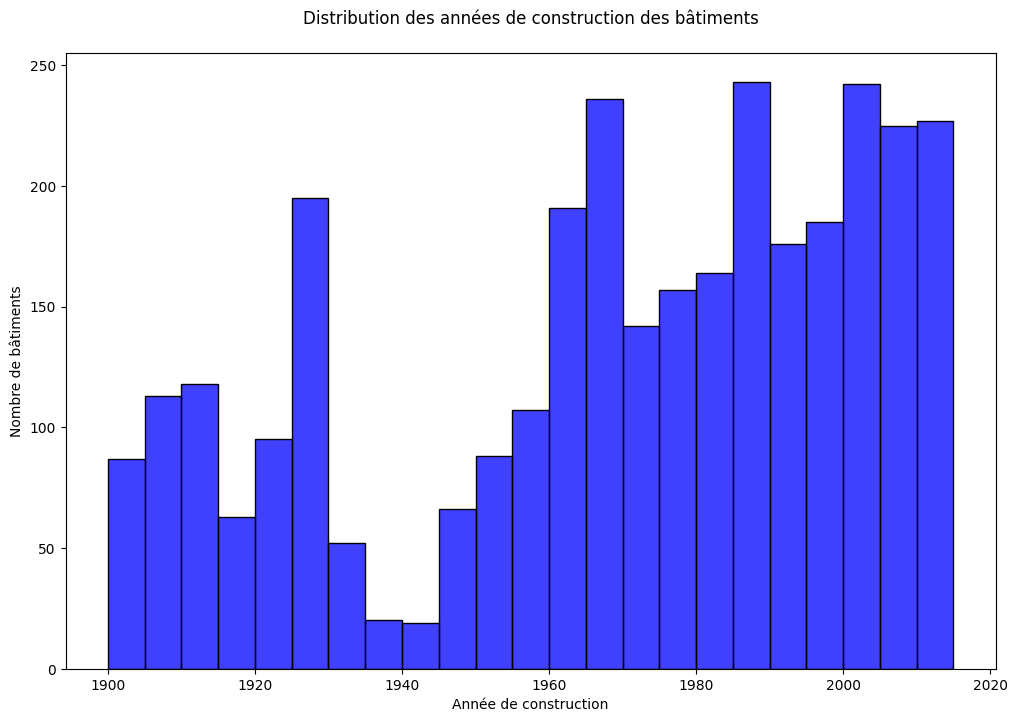

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='YearBuilt', bins=int((data.YearBuilt.max() - data.YearBuilt.min())/5), color = 'Blue')
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.show()

Nos données remontent à 2016.
Nous allons creer un nouvelle feature : BuildingAge  qui remplacera YearBuilts
cela representera mieux que des années construction


In [ ]:
df['BuildingAge'] = 2016 - df['YearBuilt'] #creation de la feature BuildingAge
df.drop('YearBuilt', axis=1, inplace=True) #suppression de la feature YearBuilt

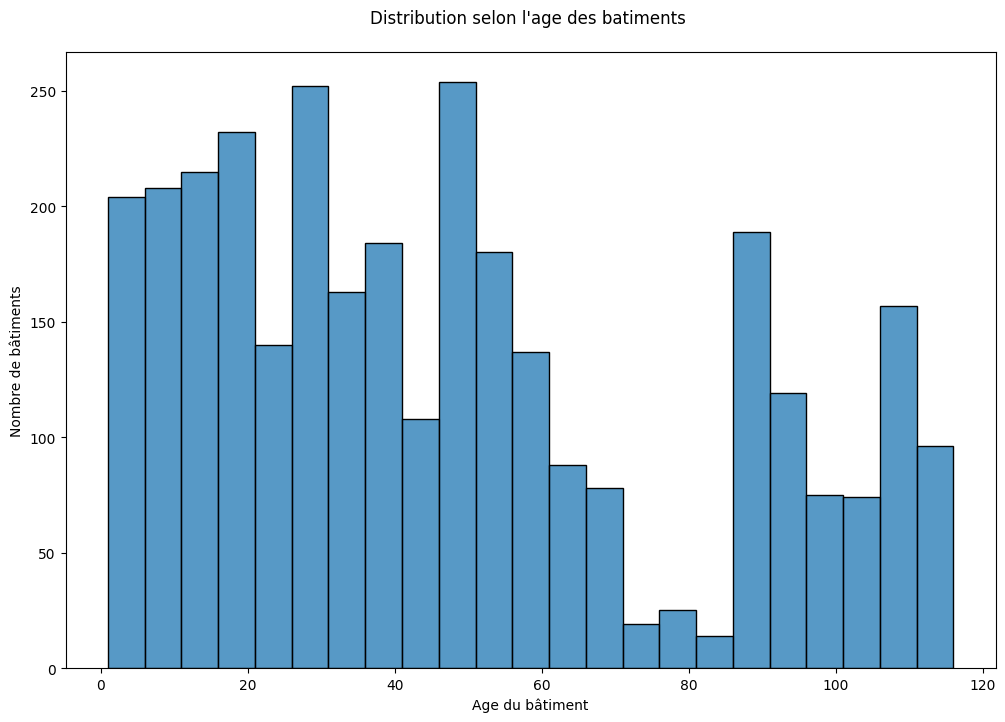

In [ ]:
#histoplot de la nouvelle distribution delon l'age du bâtiment
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution selon l'age des batiments \n")
plt.show()

In [ ]:
#camembert de la distribution des valeurs selon l'age du bâtiment
pie_BuildingAge= df[df['BuildingAge'].isin(df['BuildingAge'].value_counts(ascending=False).index[:20])]
print(pie_BuildingAge['BuildingAge'].value_counts().reset_index())
px.pie(pie_BuildingAge['BuildingAge'].value_counts().reset_index(),
      values=pie_BuildingAge['BuildingAge'].value_counts().reset_index()['BuildingAge'],
      names=pie_BuildingAge['BuildingAge'].value_counts().index,
      hole=0.3)

    index  BuildingAge
0       2           67
1      16           67
2      48           62
3      28           60
4      27           60
5       8           60
6      17           59
7      15           56
8      26           56
9      46           55
10     14           54
11     47           54
12    106           53
13    116           52
14     37           51
15      3           51
16     88           50
17     36           48
18     56           48
19     31           47


array([  1.        ,   9.84615385,  18.69230769,  27.53846154,
        36.38461538,  45.23076923,  54.07692308,  62.92307692,
        71.76923077,  80.61538462,  89.46153846,  98.30769231,
       107.15384615, 116.        ])

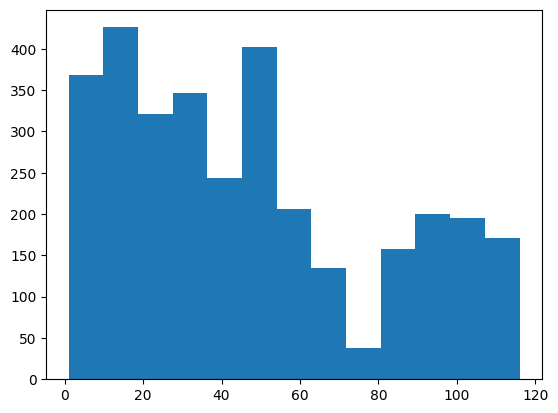

In [ ]:
fig = plt.hist(df.BuildingAge, bins="sturges")
fig[1]

In [ ]:
binning_year= fig[1]

In [ ]:
df["CatYear"] = pd.cut(df.BuildingAge, len(binning_year))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df["CatYearCode"] = enc.fit_transform(df["CatYear"].values.reshape(-1,1)).flatten()

In [ ]:
df["CatYearCode"]

0       10.0
1        2.0
2        5.0
3       10.0
4        4.0
        ... 
3206     4.0
3207     1.0
3208     4.0
3209     3.0
3210     9.0
Name: CatYearCode, Length: 3211, dtype: float64

In [ ]:
df.CatYearCode.astype('category')

0       10.0
1        2.0
2        5.0
3       10.0
4        4.0
        ... 
3206     4.0
3207     1.0
3208     4.0
3209     3.0
3210     9.0
Name: CatYearCode, Length: 3211, dtype: category
Categories (14, float64): [0.0, 1.0, 2.0, 3.0, ..., 10.0, 11.0, 12.0, 13.0]

### ENERGYSTARScore

In [ ]:
df['ENERGYSTARScore'].isnull().sum()

812

In [ ]:
df['ENERGYSTARScore'].nunique()

100

In [ ]:
data['ENERGYSTARScore'].value_counts()

100.0    90
98.0     71
96.0     62
89.0     54
93.0     51
         ..
5.0       8
19.0      8
22.0      8
9.0       5
4.0       5
Name: ENERGYSTARScore, Length: 100, dtype: int64

Dans le texte de la mission, nous devons voir l'impact de l'energyscore sur notre prevision. Nous ne pouvons remplacer les valeurs manquantes.


In [ ]:
df=df.dropna(subset=['ENERGYSTARScore'])

In [ ]:
df.shape

(2399, 39)

<Axes: >

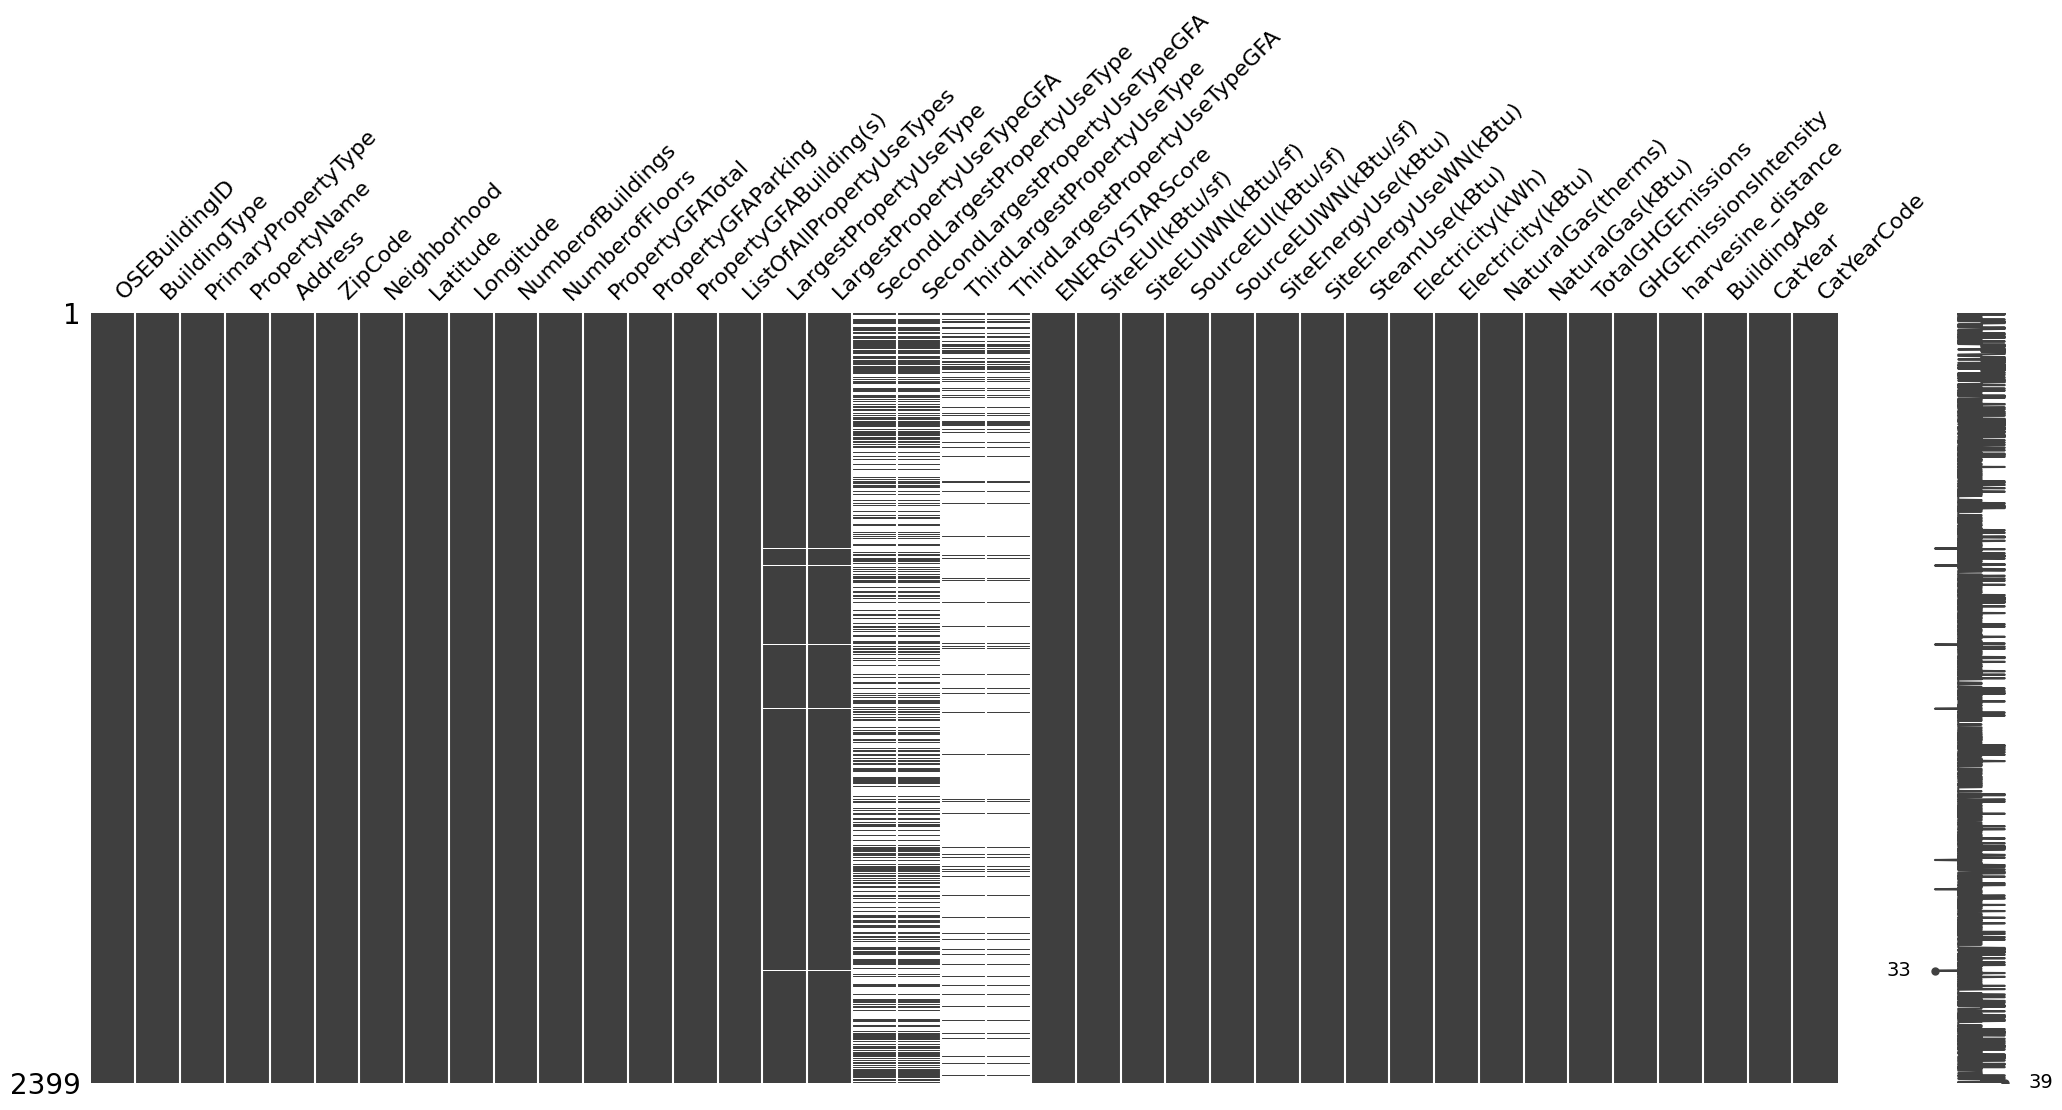

In [ ]:
msn.matrix(df)

### NumberOfBuildings

In [ ]:
df['NumberofBuildings'].isnull().sum()

0

In [ ]:
df['NumberofBuildings'].nunique()

12

<Axes: >

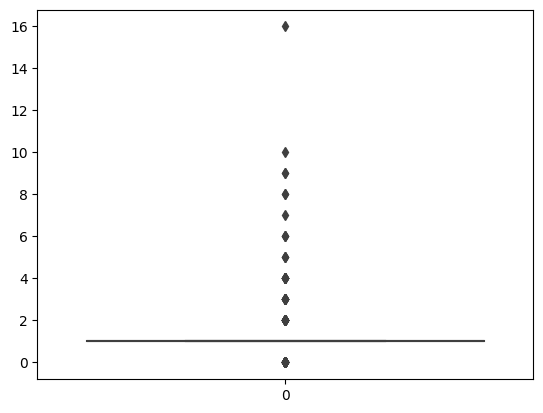

In [ ]:
sns.boxplot(df['NumberofBuildings'])

In [ ]:
pie_NumberofBuildings= df[df['NumberofBuildings'].isin(df['NumberofBuildings'])]
print(pie_NumberofBuildings['NumberofBuildings'].value_counts().reset_index())
px.pie(pie_NumberofBuildings['NumberofBuildings'].value_counts().reset_index(),
      values=pie_NumberofBuildings['NumberofBuildings'].value_counts().reset_index()['NumberofBuildings'],
      names=pie_NumberofBuildings['NumberofBuildings'].value_counts().index,
      hole=0.3)

    index  NumberofBuildings
0     1.0               2284
1     0.0                 56
2     2.0                 25
3     3.0                 11
4     4.0                 10
5     6.0                  3
6     5.0                  3
7     9.0                  2
8     8.0                  2
9     7.0                  1
10   16.0                  1
11   10.0                  1


### NumberofFloors

In [ ]:
df['NumberofFloors'].isnull().sum()

0

In [ ]:
df['NumberofFloors'].nunique()

49

In [ ]:
df['NumberofFloors'].unique()

array([12, 11, 41, 10, 18, 15,  6, 25,  9, 33, 28,  5,  4,  3,  2, 24,  8,
       20, 34,  7,  1, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42, 63, 13,
       21, 55, 46, 19, 30, 56,  0, 26, 76, 27, 31, 99, 38, 39, 32])

<Axes: >

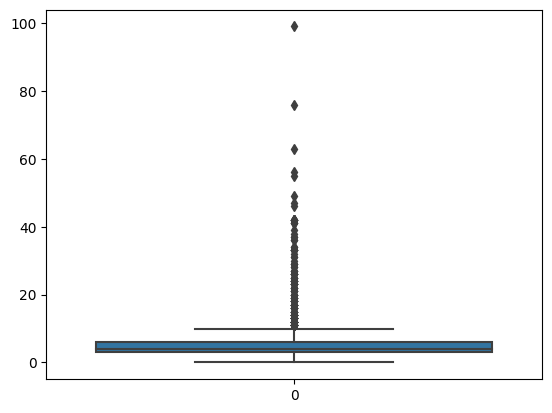

In [ ]:
sns.boxplot(df['NumberofFloors'])

In [ ]:
pie_NumberofFloors= df[df['NumberofFloors'].isin(df['NumberofFloors'].value_counts(ascending=False).index[:20])]
print(pie_NumberofFloors['NumberofFloors'].value_counts().reset_index())
px.pie(pie_NumberofFloors['NumberofFloors'].value_counts().reset_index(),
      values=pie_NumberofFloors['NumberofFloors'].value_counts().reset_index()['NumberofFloors'],
      names=pie_NumberofFloors['NumberofFloors'].value_counts().index,
      hole=0.3)

    index  NumberofFloors
0       4             545
1       3             499
2       1             253
3       2             236
4       5             229
5       6             225
6       7             127
7       8              47
8      10              29
9      11              26
10     12              18
11      9              15
12     13              15
13     14              12
14      0              10
15     17               9
16     18               7
17     16               7
18     23               7
19     26               6


In [ ]:
df['NumberofFloors'].describe()

count    2399.000000
mean        5.237182
std         6.158866
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        99.000000
Name: NumberofFloors, dtype: float64

## 2.2 Energy Features (Consumption & Emission)

les sources d'energies presentes dans ce dataframe sont: 
1. Steamuse
2. Electricity
3. Natural Gas

pour mieux comprendre la conssommation des sites ( Site energy use) et les Sources use on va detailler ces variables. On ne gardera que les valeurs en kBtu pour avoir les memes unités ( on pourra si besoin les convertire vers les autres unites tel kWh ou therms)

Pour convertir kWh en kBtu:
x kWh = x * 3.14 kBtu

In [ ]:
energy_features = ['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','SiteEUI(kBtu/sf)',  'SiteEnergyUse(kBtu)','SourceEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)']
emission_features = ['TotalGHGEmissions','GHGEmissionsIntensity' ]

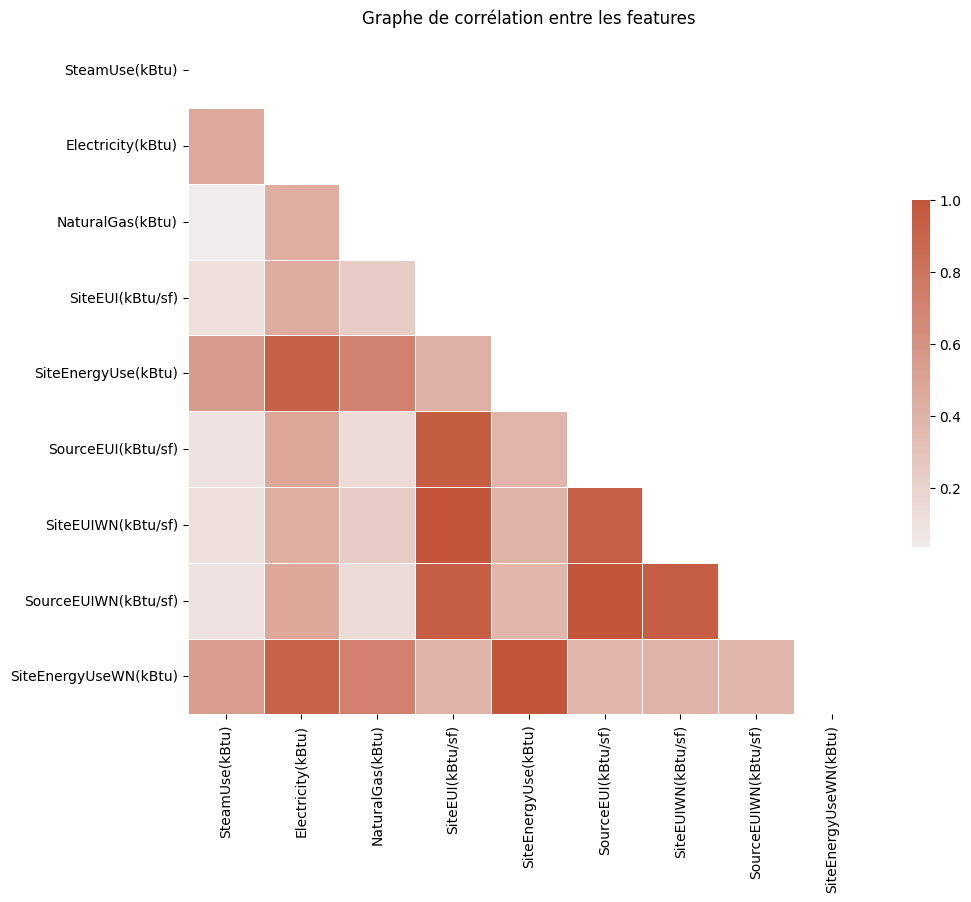

In [ ]:
# graphe de correlation
corr =df[energy_features].corr()

# mask
mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title('Graphe de corrélation entre les features')
plt.show()

###SteamUse (kBtu)

In [ ]:
df['SteamUse(kBtu)'].isnull().sum()

0

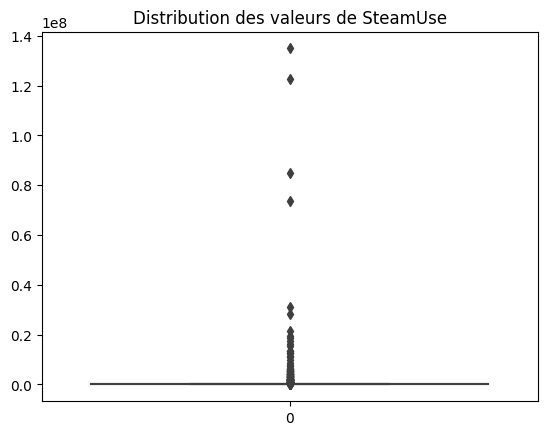

In [ ]:
sns.boxplot(data['SteamUse(kBtu)'])
plt.title("Distribution des valeurs de SteamUse")
plt.savefig("Distribution des valeurs de SteamUse.png")
plt.show()

### Electricity kBtu Vs kWh

In [ ]:
df['Electricity(kBtu)'].isnull().sum()

0

In [ ]:
df['Electricity(kWh)'].isnull().sum()

0

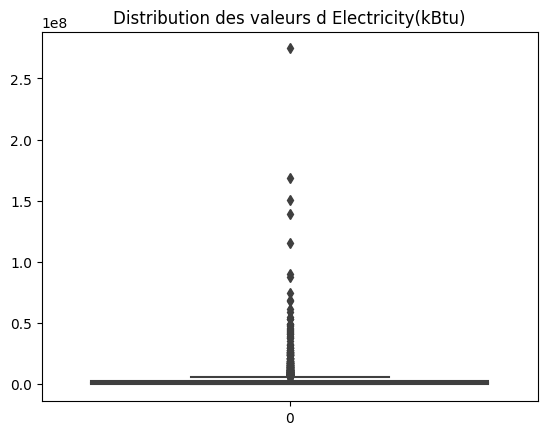

In [ ]:
sns.boxplot(df['Electricity(kBtu)'])
plt.title("Distribution des valeurs d Electricity(kBtu)")
plt.savefig("Distribution des valeurs d Electricity(kBtu).png")
plt.show()

In [ ]:
df.drop('Electricity(kWh)', axis = 1, inplace=True)

In [ ]:
df.shape

(2399, 38)

### NaturalGas therms Vs kBtu

In [ ]:
df['NaturalGas(therms)'].describe()

count    2.399000e+03
mean     1.299654e+04
std      7.413447e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.848190e+03
75%      1.140554e+04
max      2.979090e+06
Name: NaturalGas(therms), dtype: float64

In [ ]:
df['NaturalGas(therms)'].isnull().sum()

0

In [ ]:
df['NaturalGas(kBtu)'].describe()

count    2.399000e+03
mean     1.299654e+06
std      7.413447e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.848190e+05
75%      1.140554e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64

In [ ]:
df['NaturalGas(kBtu)'].isnull().sum()

0

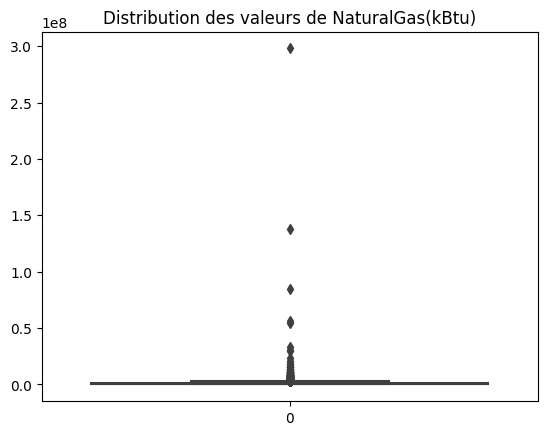

In [ ]:
sns.boxplot(df['NaturalGas(kBtu)'])
plt.title("Distribution des valeurs de NaturalGas(kBtu)")
plt.savefig("Distribution des valeurs de NaturalGas(kBtu).png")
plt.show()

In [ ]:
df.drop('NaturalGas(therms)', axis = 1, inplace=True)

### EnergyUse

In [ ]:
df['SiteEUI(kBtu/sf)'].isnull().sum()

0

In [ ]:
df['SiteEUI(kBtu/sf)'].nunique()

835

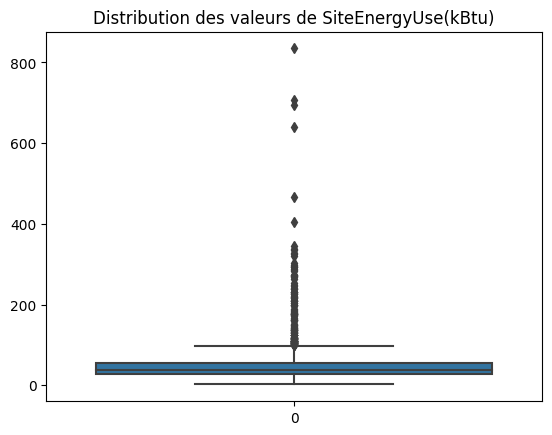

In [ ]:
sns.boxplot(df['SiteEUI(kBtu/sf)'])
plt.title("Distribution des valeurs de SiteEnergyUse(kBtu)")

plt.show()

In [ ]:
df['ratioElec']= df['Electricity(kBtu)']/df['SiteEnergyUse(kBtu)']
df['ratioSteam']=df['SteamUse(kBtu)']/df['SiteEnergyUse(kBtu)']
df['ratioNaturalGas']=df['NaturalGas(kBtu)']/df['SiteEnergyUse(kBtu)']
df.drop(['Electricity(kBtu)','SteamUse(kBtu)','NaturalGas(kBtu)'], axis = 1, inplace=True)

In [ ]:
df.shape

(2399, 37)

In [ ]:
df.head(2)

OSEBuildingID    BuildingType PrimaryPropertyType          PropertyName  \
0              1  NonResidential               Hotel  Mayflower park hotel   
1              2  NonResidential               Hotel       Paramount Hotel   

           Address  ZipCode Neighborhood  Latitude  Longitude  \
0    405 Olive way  98101.0     downtown  47.61220 -122.33799   
1  724 Pine street  98101.0     downtown  47.61317 -122.33393   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   

   PropertyGFABuilding(s)   ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                   88434                       Hotel                  Hotel   
1                   88502  Hotel, Parking, Restaurant                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                             NaN             60.0         81.699997   
1                          4622.0             61.0         94.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
0            7226362.5              7456910.0             249.98   
1            8387933.0              8664479.0             295.86   

   GHGEmissionsIntensity  harvesine_distance  BuildingAge           CatYear  \
0                   2.83            0.496782           89  (83.143, 91.357]   
1                   2.86            0.488726           20  (17.429, 25.643]   

   CatYearCode  ratioElec  ratioSteam  ratioNaturalGas  
0         10.0   0.546060    0.277302         0.176638  
1          2.0   0.386609    0.000000         0.613391

In [ ]:
#on enregistre ce dataset nettoyé
df.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/data1.csv', index=False)

## 2.3 Surface features

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/data1.csv')

In [ ]:
data.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode Neighborhood  \
0         Mayflower park hotel    405 Olive way  98101.0     downtown   
1              Paramount Hotel  724 Pine street  98101.0     downtown   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0     downtown   
3                    HOTEL MAX   620 STEWART ST  98101.0     downtown   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0     downtown   

   Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.61220 -122.33799                1.0              12             88434   
1  47.61317 -122.33393                1.0              11            103566   
2  47.61393 -122.33810                1.0              41            956110   
3  47.61412 -122.33664                1.0              10             61320   
4  47.61375 -122.34047                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   TotalGHGEmissions  GHGEmissionsIntensity  harvesine_distance  BuildingAge  \
0             249.98                   2.83            0.496782           89   
1             295.86                   2.86            0.488726           20  

In [ ]:
data.shape

(2399, 37)

<Axes: >

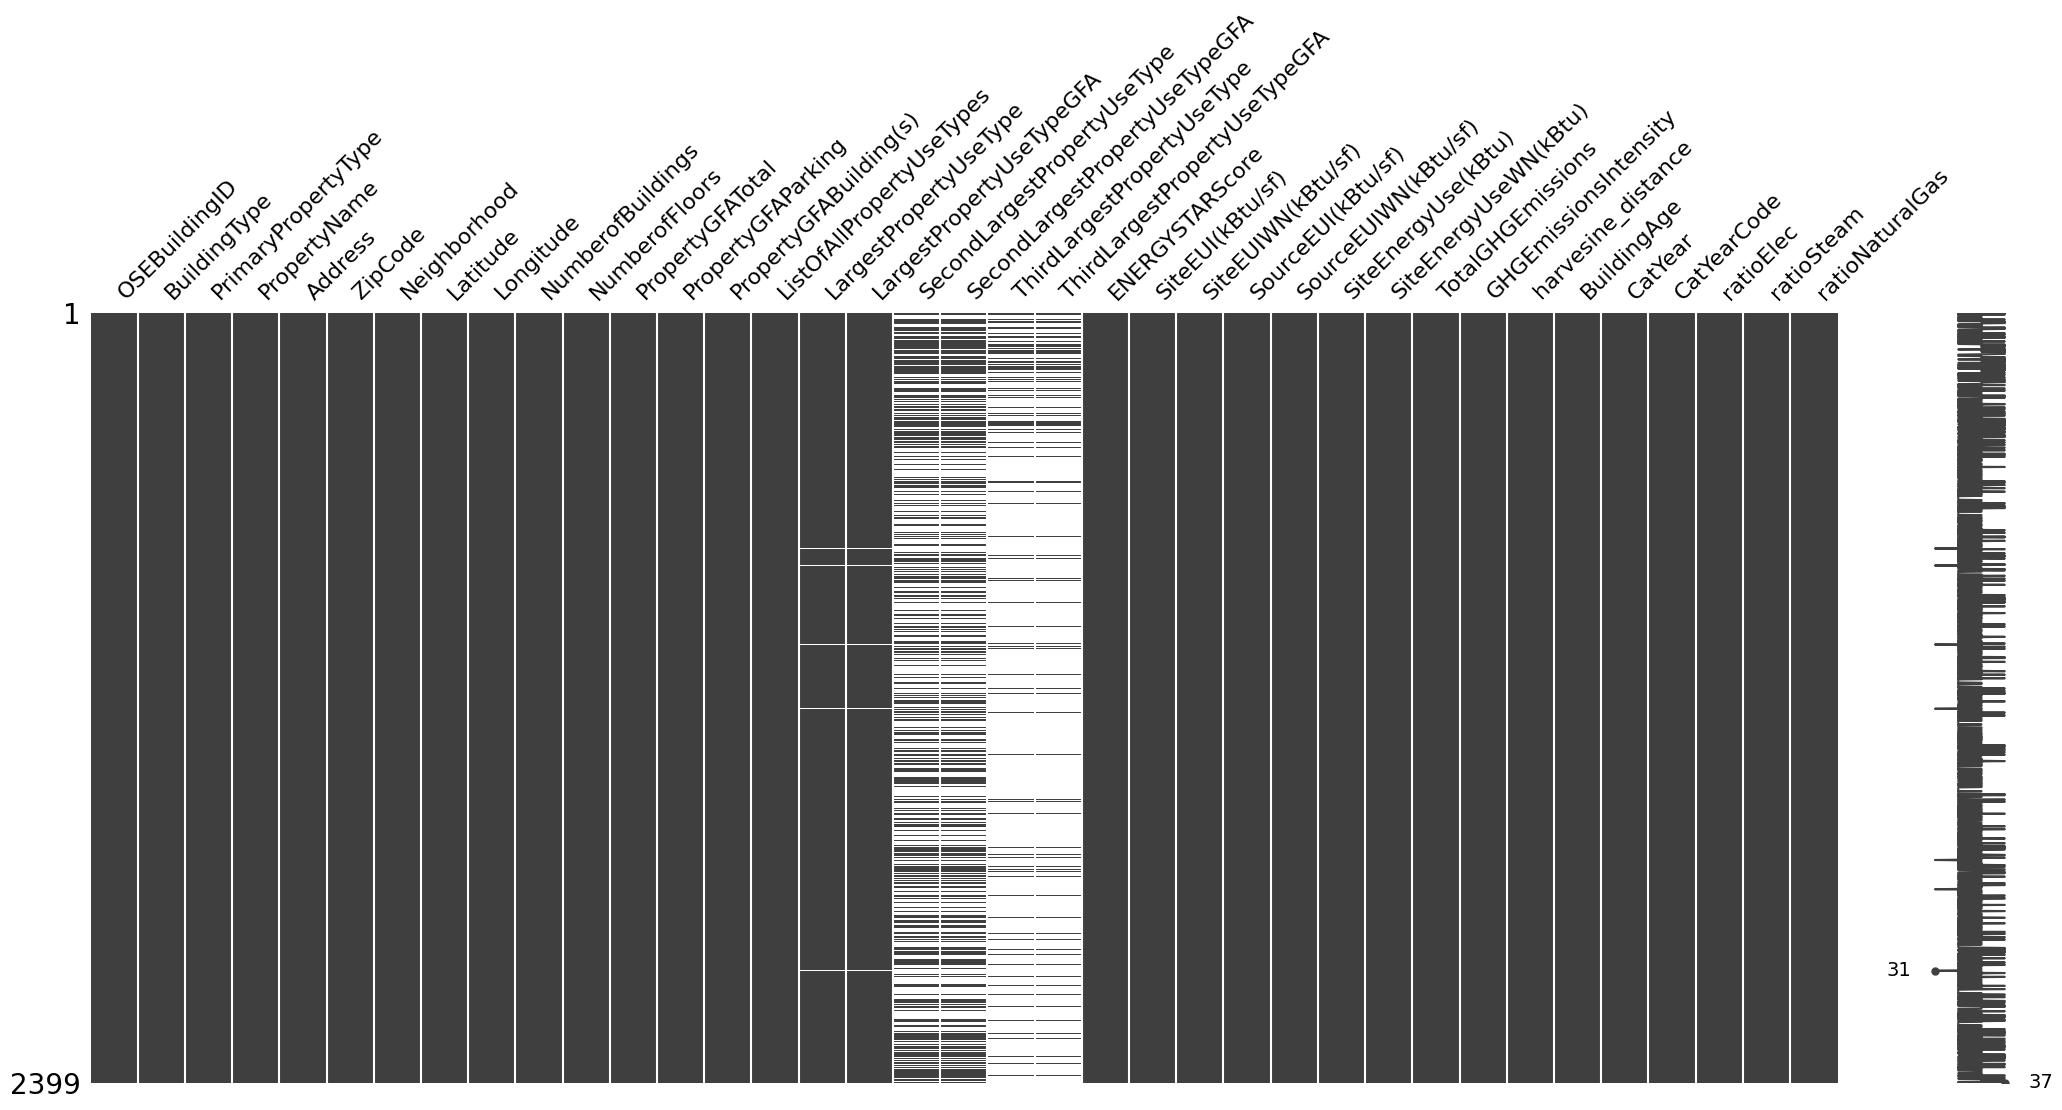

In [ ]:
msn.matrix(data)

In [ ]:
description_features = ['BuildingType', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA']

<Axes: >

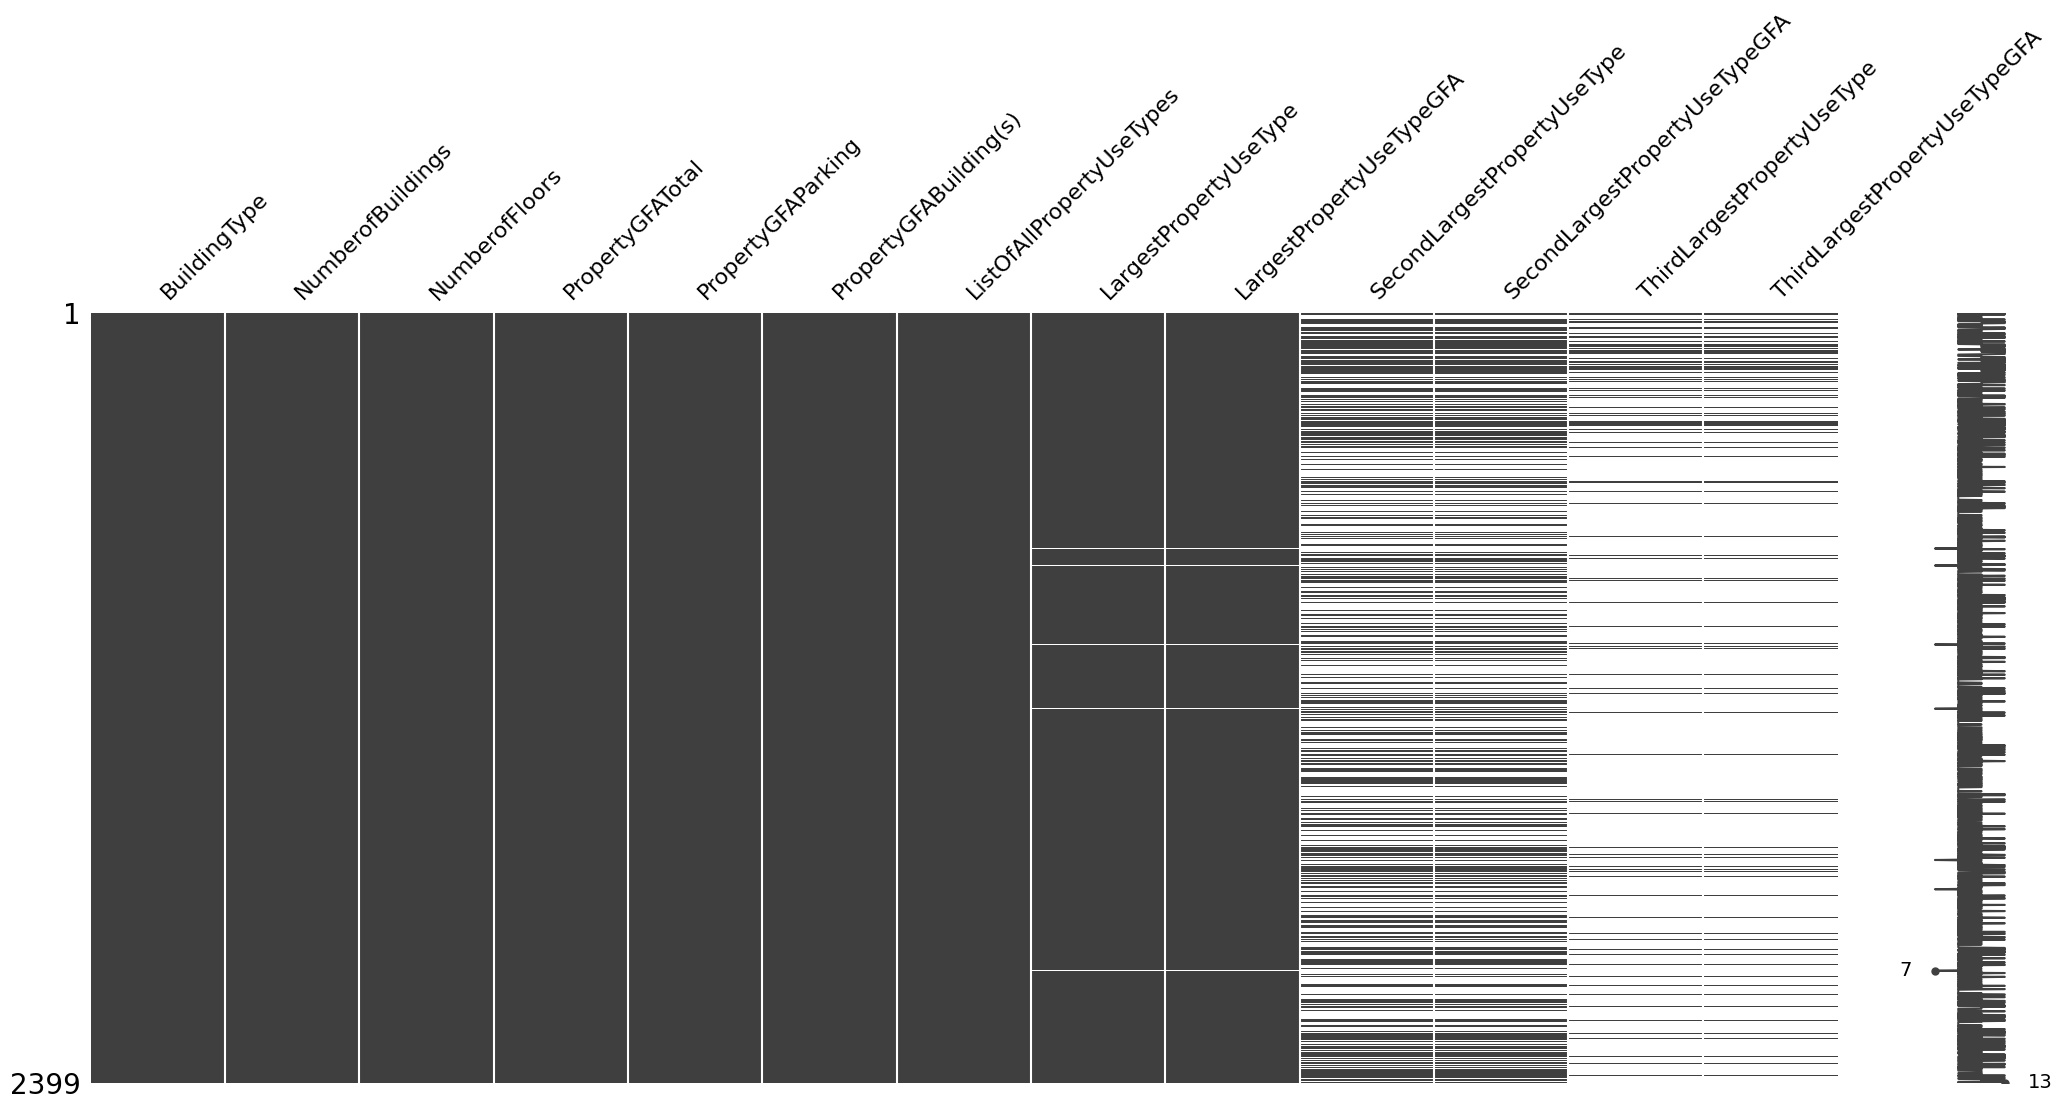

In [ ]:
msn.matrix(data[description_features])

In [ ]:
data['PropertyGFATotal'].isnull().sum()

0

<Axes: >

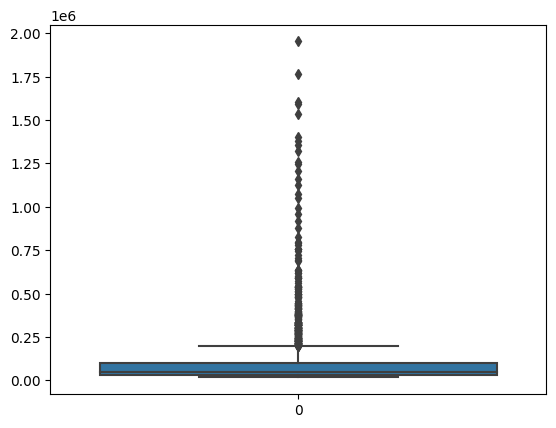

In [ ]:
sns.boxplot(data['PropertyGFATotal'])

In [ ]:
data['ListOfAllPropertyUseTypes'].isnull().sum()

0

In [ ]:
data['ListOfAllPropertyUseTypes'].duplicated().sum()

2185

In [ ]:
data['ListOfAllPropertyUseTypes'].nunique()

214

In [ ]:
data['ListOfAllPropertyUseTypes'].unique()

array(['Hotel', 'Hotel, Parking, Restaurant',
       'Hotel, Parking, Swimming Pool', 'Multifamily Housing',
       'Hotel, Parking', 'Courthouse',
       'Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
       'K-12 School', 'Non-Refrigerated Warehouse, Office',
       'Office, Other - Education', 'Data Center, Office, Retail Store',
       'Office, Retail Store', 'Hotel, Parking, Restaurant, Retail Store',
       'Hotel, Other - Entertainment/Public Assembly, Retail Store',
       'Office', 'Parking, Senior Care Community',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Office, Other, Parking, Retail Store', 'Office, Other, Parking',
       'Hotel, Swimming Pool', 'Office, Parking',
       'Hospital (General Medical & Surgical), Parking',
       'Residence Hall/Dormitory', 'K-12 School, Parking',
       'Non-Refrigerated Warehouse, Office, Other - Services',
       'Restaurant, Retail Store',
       'Ho

In [ ]:
pie_PrimaryPropertyType= data[data['PrimaryPropertyType'].isin(data['PrimaryPropertyType'].value_counts(ascending=False).index[:20])]
print(pie_PrimaryPropertyType['PrimaryPropertyType'].value_counts().reset_index())
px.pie(pie_PrimaryPropertyType['PrimaryPropertyType'].value_counts().reset_index(),
      values=pie_PrimaryPropertyType['PrimaryPropertyType'].value_counts().reset_index()['PrimaryPropertyType'],
      names=pie_PrimaryPropertyType['PrimaryPropertyType'].value_counts().index,
      hole=0.3)

                          index  PrimaryPropertyType
0          Low-Rise Multifamily                  824
1          Mid-Rise Multifamily                  451
2   Small- and Mid-Sized Office                  235
3                  Large Office                  160
4                     Warehouse                  141
5         High-Rise Multifamily                   91
6                         Hotel                   73
7                  Retail Store                   72
8              Worship Facility                   63
9                   K-12 School                   49
10        Senior Care Community                   41
11          Distribution Center                   40
12  Supermarket / Grocery Store                   39
13               Medical Office                   37
14           Mixed Use Property                   36
15               Residence Hall                   21
16                        Other                   11
17                     Hospital               

In [ ]:
data['PrimaryPropertyType'].isnull().sum()

0

In [ ]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Mid-Rise Multifamily', 'Other', 'Mixed Use Property',
       'K-12 School', 'Small- and Mid-Sized Office', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Warehouse', 'Worship Facility',
       'Low-Rise Multifamily', 'Supermarket / Grocery Store',
       'Distribution Center', 'Refrigerated Warehouse',
       'High-Rise Multifamily'], dtype=object)

In [ ]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Multifamily Housing', 'Courthouse', 'Office',
       'K-12 School', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)',
       'Residence Hall/Dormitory', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Worship Facility', 'Data Center',
       'Parking', 'Supermarket/Grocery Store', 'Distribution Center',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse', 'Other',
       nan, 'Bank Branch'], dtype=object)

In [ ]:
data['LargestPropertyUseType'].nunique()

21

In [ ]:
data['SecondLargestPropertyUseType'].isnull().sum()

1292

In [ ]:
data['SecondLargestPropertyUseType'].nunique()

35

In [ ]:
data['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Laboratory', 'Non-Refrigerated Warehouse',
       'Other - Education', 'Retail Store',
       'Other - Entertainment/Public Assembly', 'Restaurant',
       'Swimming Pool', 'Self-Storage Facility', 'Office',
       'Other - Services', 'Other - Recreation',
       'Convenience Store without Gas Station', 'Other',
       'Performing Arts', 'College/University',
       'Supermarket/Grocery Store', 'Data Center', 'Adult Education',
       'Distribution Center', 'Multifamily Housing', 'Bar/Nightclub',
       'Financial Office', 'Manufacturing/Industrial Plant',
       'Other - Restaurant/Bar', 'Bank Branch', 'K-12 School',
       'Food Service', 'Senior Care Community', 'Hotel',
       'Worship Facility', 'Fitness Center/Health Club/Gym',
       'Other/Specialty Hospital', 'Medical Office', 'Pre-school/Daycare'],
      dtype=object)

In [ ]:
data['ThirdLargestPropertyUseType'].isnull().sum()

2123

In [ ]:
data['ThirdLargestPropertyUseType'].nunique()

38

In [ ]:
data['ThirdLargestPropertyUseType'].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Non-Refrigerated Warehouse',
       'Data Center', 'Retail Store', 'Other', 'Other - Services',
       'Medical Office', 'Food Service', 'Parking',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Pre-school/Daycare', 'Convenience Store without Gas Station',
       'Financial Office', 'Other - Restaurant/Bar', 'Other - Education',
       'Distribution Center', 'Office', 'Laboratory', 'Bank Branch',
       'Other - Entertainment/Public Assembly', 'Multifamily Housing',
       'Hotel', 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Other - Technology/Science',
       'Refrigerated Warehouse', 'Bar/Nightclub', 'Food Sales',
       'Supermarket/Grocery Store', 'Other/Specialty Hospital',
       'Worship Facility', 'Strip Mall', 'Fast Food Restaurant',
       'Residence Hall/Dormitory', 'College/University',
       'Other - Public Services'], dtype=object)

In [ ]:
data[data['ThirdLargestPropertyUseType'].isnull()]

OSEBuildingID          BuildingType   PrimaryPropertyType  \
0                 1        NonResidential                 Hotel   
2                 3        NonResidential                 Hotel   
3                 5        NonResidential                 Hotel   
5                10        NonResidential                 Hotel   
6                12        NonResidential                 Hotel   
...             ...                   ...                   ...   
2393          50088  Multifamily LR (1-4)  Low-Rise Multifamily   
2394          50090  Multifamily MR (5-9)  Mid-Rise Multifamily   
2395          50092  Multifamily MR (5-9)        Residence Hall   
2397          50095  Multifamily MR (5-9)  Mid-Rise Multifamily   
2398          50098  Multifamily LR (1-4)  Low-Rise Multifamily   

                 PropertyName               Address  ZipCode Neighborhood  \
0        Mayflower park hotel         405 Olive way  98101.0     downtown   
2     5673-The Westin Seattle       1900 5th Avenue  98101.0     downtown   
3                   HOTEL MAX        620 STEWART ST  98101.0     downtown   
5                      Camlin       1619 9th Avenue  98101.0     downtown   
6        311wh-Pioneer Square           612 2nd Ave  98104.0     downtown   
...                       ...                   ...      ...          ...   
2393          Vibe Apartments  3601 Greenwood Ave N  98103.0   lake union   
2394     131910 - LIV Seattle  4717 Brooklyn Ave NE  98105.0    northeast   
2395  Terry Hall & Maple Hall   1101 NE Campus Pkwy  98195.0    northeast   
2397           Broadstone Sky      4745 40th Ave SW  98116.0    southwest   
2398                     1806      1806 23rd Avenue  98122.0      central   

      Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     47.61220 -122.33799                1.0              12   
2     47.61393 -122.33810                1.0              41   
3     47.61412 -122.33664                1.0              10   
5     47.61390 -122.33283                1.0              11   
6     47.60294 -122.33263                1.0              15   
...        ...        ...                ...             ...   
2393  47.65295 -122.35593                1.0               4   
2394  47.66366 -122.31450                1.0               7   
2395  47.65577 -122.31702                1.0               7   
2397  47.55976 -122.38320                1.0               7   
2398  47.61791 -122.30230                1.0               4   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
2               956110              196718                  759392   
3                61320                   0                   61320   
5                83008                   0                   83008   
6               163984                   0                  163984   
...                ...                 ...                     ...   
2393             41403                   0                   41403   
2394             63825                4850                   58975   
2395            325000                   0                  325000   
2397            208136               58818                  149318   
2398             20246                2580                   17666   

         ListOfAllPropertyUseTypes    LargestPropertyUseType  \
0                            Hotel                     Hotel   
2                            Hotel                     Hotel   
3                            Hotel                     Hotel   
5                            Hotel                     Hotel   
6                            Hotel                     Hotel   
...                            ...                       ...   
2393  Multifamily Housing, Parking       Multifamily Housing   
2394           Multifamily Housing       Multifamily Housing   
2395      Residence Hall/Dormitory  Residence Hall/Dormitory   
2397  Multifamily Housing,

In [ ]:
list_property = data["ListOfAllPropertyUseTypes"].fillna(" ").apply(lambda x: x.lower() + " ").sum()
list_property2 = list_property.replace(",", " ").split(" ")

In [ ]:
list_property2.remove("")

In [ ]:
list_property3 = [el.replace(r"(","").replace(r")", "") for el in list_property2 if el not in ["", "-", "etc", "&"]]

In [ ]:
list_property3 = list(set(list_property3))

In [ ]:
list_property3

['self-storage',
 'home',
 'bar/nightclub',
 'supermarket/grocery',
 'outpatient',
 'center',
 'manufacturing/industrial',
 'community',
 'rehabilitation/physical',
 'library',
 'housing',
 'gas',
 'food',
 'retail',
 'hall/dormitory',
 'education',
 'services',
 'social/meeting',
 'station',
 'courthouse',
 'performing',
 'wholesale',
 'fast',
 'facility',
 'center/health',
 'dry',
 'other',
 'multifamily',
 'assembly',
 'technology/science',
 'lifestyle',
 'k-12',
 'convenience',
 'plant',
 'family',
 'bank',
 'warehouse',
 'school',
 'hospital',
 'adult',
 'mall',
 'personal',
 'worship',
 'hall',
 'senior',
 'therapy',
 'care',
 'health/beauty',
 'single',
 'swimming',
 'club/supercenter',
 'arts',
 'fitness',
 'surgical',
 'public',
 'sales',
 'branch',
 'cleaning',
 'service',
 'medical',
 'non-refrigerated',
 'recreation',
 'data',
 'financial',
 'pre-school/daycare',
 'college/university',
 'parking',
 'laboratory',
 'lodging/residential',
 'without',
 'other/specialty',
 'stor

In [ ]:
len(list_property3)

86

In [ ]:
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data.describe(include="all")

OSEBuildingID    BuildingType   PrimaryPropertyType     PropertyName  \
count     2399.000000            2399                  2399             2399   
unique            NaN               7                    19             2391   
top               NaN  nonresidential  low-rise multifamily  northgate plaza   
freq              NaN             976                   824                3   
mean     21517.035015             NaN                   NaN              NaN   
std      12082.212393             NaN                   NaN              NaN   
min          1.000000             NaN                   NaN              NaN   
25%      20140.500000             NaN                   NaN              NaN   
50%      23191.000000             NaN                   NaN              NaN   
75%      26069.500000             NaN                   NaN              NaN   
max      50098.000000             NaN                   NaN              NaN   

                  Address       ZipCode Neighborhood     Latitude  \
count                2399   2399.000000         2399  2399.000000   
unique               2386           NaN           13          NaN   
top     2600 sw barton st           NaN     downtown          NaN   
freq                    4           NaN          399          NaN   
mean                  NaN  98117.064193          NaN    47.626080   
std                   NaN     18.943797          NaN     0.047295   
min                   NaN  98012.000000          NaN    47.502240   
25%                   NaN  98105.000000          NaN    47.603730   
50%                   NaN  98115.000000          NaN    47.619910   
75%                   NaN  98122.000000          NaN    47.657705   
max                   NaN  98272.000000          NaN    47.733870   

          Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count   2399.000000        2399.000000     2399.000000      2.399000e+03   
unique          NaN                NaN             NaN               NaN   
top             NaN                NaN             NaN               NaN   
freq            NaN                NaN             NaN               NaN   
mean    -122.335061           1.045019        5.237182      9.800058e+04   
std        0.026704           0.613015        6.158866      1.550902e+05   
min     -122.414250           0.000000        0.000000      1.630000e+04   
25%     -122.351030           1.000000        3.000000      2.982550e+04   
50%     -122.332630           1.000000        4.000000      4.633900e+04   
75%     -122.319920           1.000000        6.000000      9.701000e+04   
max     -122.260280          16.000000       99.000000      1.952220e+06   

        PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
count          2399.000000            2.399000e+03                      2399   
unique                 NaN                     NaN                       214   
top                    NaN                     NaN       multifamily housing   
freq                   NaN                     NaN                       778   
mean           8882.437266            8.911814e+04                       NaN   
std           34044.490791            1.356570e+05                       NaN   
min               0.000000            3.636000e+03                       NaN   
25%               0.000000            2.908150e+04                       NaN   
50%               0.000000            4.542100e+04                       NaN   
75%               0.000000            8.954950e+04                       NaN   
max          512608.000000            1.765970e+06                       NaN   

       LargestPropertyUseType  LargestPropertyUseTypeGFA  \
count                    2392               2.392000e+03   
unique                     21                        NaN   
top       multifamily housing                        NaN   
freq                     1373                        NaN   
mean                      NaN               

In [ ]:
data.head(3)

OSEBuildingID    BuildingType PrimaryPropertyType             PropertyName  \
0              1  nonresidential               hotel     mayflower park hotel   
1              2  nonresidential               hotel          paramount hotel   
2              3  nonresidential               hotel  5673-the westin seattle   

           Address  ZipCode Neighborhood  Latitude  Longitude  \
0    405 olive way  98101.0     downtown  47.61220 -122.33799   
1  724 pine street  98101.0     downtown  47.61317 -122.33393   
2  1900 5th avenue  98101.0     downtown  47.61393 -122.33810   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   

   PropertyGFABuilding(s)   ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                   88434                       hotel                  hotel   
1                   88502  hotel, parking, restaurant                  hotel   
2                  759392                       hotel                  hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      parking   
2                   756493.0                          NaN   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  restaurant   
2                              NaN                         NaN   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                             NaN             60.0         81.699997   
1                          4622.0             61.0         94.800003   
2                             NaN             43.0         96.000000   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997          241.899994            244.100006   

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
0            7226362.5              7456910.0             249.98   
1            8387933.0              8664479.0             295.86   
2           72587024.0             73937112.0            2089.28   

   GHGEmissionsIntensity  harvesine_distance  BuildingAge           CatYear  \
0                   2.83            0.496782           89  (83.143, 91.357]   
1                   2.86            0.488726           20  (17.429, 25.643]   
2                   2.19            0.602378           47  (42.071, 50.286]   

   CatYearCode  ratioElec  ratioSteam  ratioNaturalGas  
0         10.0   0.546060    0.277302         0.176638  
1          2.0   0.386609    0.000000         0.613391  
2          5.0   0.682307    0.297113         0.020579

In [ ]:
list_building_type = data.BuildingType.unique()
list_building_type

array(['nonresidential', 'multifamily mr (5-9)', 'campus',
       'sps-district k-12', 'multifamily lr (1-4)', 'nonresidential cos',
       'multifamily hr (10+)'], dtype=object)

In [ ]:
list_largest = list(data.LargestPropertyUseType.unique())

In [ ]:
list_largest

['hotel',
 'multifamily housing',
 'courthouse',
 'office',
 'k-12 school',
 'senior care community',
 'medical office',
 'retail store',
 'hospital (general medical & surgical)',
 'residence hall/dormitory',
 'financial office',
 'non-refrigerated warehouse',
 'worship facility',
 'data center',
 'parking',
 'supermarket/grocery store',
 'distribution center',
 'wholesale club/supercenter',
 'refrigerated warehouse',
 'other',
 nan,
 'bank branch']

In [ ]:
len(list_largest)

22

In [ ]:
data1 = data[~data.BuildingType.isin(['multifamily mr (5-9)', "multifamily lr (1-4)", "multifamily hr (10+)"])]

In [ ]:
data1.shape

(997, 37)

In [ ]:
data1.Neighborhood.unique()

array(['downtown', 'northeast', 'greater duwamish',
       'magnolia / queen anne', 'ballard', 'northwest', 'lake union',
       'east', 'central', 'southwest', 'southeast', 'north', 'delridge'],
      dtype=object)

In [ ]:
data1.Neighborhood = data1.Neighborhood.str.replace('delridge neighborhoods','delridge')
data1.Neighborhood.unique()

array(['downtown', 'northeast', 'greater duwamish',
       'magnolia / queen anne', 'ballard', 'northwest', 'lake union',
       'east', 'central', 'southwest', 'southeast', 'north', 'delridge'],
      dtype=object)

In [ ]:
set(list_largest).intersection(set(list_property3))

{'courthouse', 'hotel', 'office', 'other', 'parking'}

In [ ]:
set(list_largest).intersection(set(data1.SecondLargestPropertyUseType.unique()))

{'bank branch',
 'data center',
 'distribution center',
 'financial office',
 'hotel',
 'k-12 school',
 'medical office',
 'multifamily housing',
 nan,
 'non-refrigerated warehouse',
 'office',
 'other',
 'parking',
 'retail store',
 'supermarket/grocery store',
 'worship facility'}

In [ ]:
data1.SecondLargestPropertyUseType.nunique()

31

In [ ]:
data1.LargestPropertyUseType.nunique()

21

In [ ]:
data1.ThirdLargestPropertyUseType.nunique()

31

In [ ]:
remap_property = {'hotel':'hotel',
                  'police station':"public service",
                  'other - entertainment/public assembly':'entertainment',
                  'multifamily housing':'housing',
                  'library':'social',
                  'fitness center/health club/gym':'entertainment',
                  'social/meeting hall': "social",
                  "courthouse": "public service",
                  'other':"other",
                  'k-12 school':"education",
                  'college/university':"education",
                  'automobile dealership':"mall",
                  "office":"office",
                 'self-storage facility':"storage",
                 'non-refrigerated warehouse':"storage",
                 'other - mall':"mall",
                  'senior care community':"health",
                  "medical office":"health", 
                 'retail store':"mall",
 'hospital (general medical & surgical)':"health",
 'museum':"social",
 'repair services (vehicle, shoe, locksmith, etc)':"mall",
 'other - lodging/residential':"housing",
 'residence hall/dormitory':"housing",
 'other/specialty hospital':"health",
 'financial office':"office",
 'distribution center':"mall",
 'parking':"parking",
 'worship facility':"social",
 'restaurant':"entertainment",
 'data center':"other",
 'laboratory':"health",
 'supermarket/grocery store':"mall",
 'convention center':"social",
 'urgent care/clinic/other outpatient':"health",
 'other - services':"public service",
 'strip mall':"mall",
 'wholesale club/supercenter':"mall",
 'refrigerated warehouse':"storage",
 'manufacturing/industrial plant':"plant",
 'other - recreation':"entertainment",
 'lifestyle center':"other",
 'other - public services':"public service",
 'other - education':"education",
 'fire station':"public service",
 'performing arts':"entertainment",
 'residential care facility':"health",
 'bank branch':"office",
 'other - restaurant/bar':"entertainment",
 'food service':"other",
 'adult education':"education",
 'other - utility':"other",
 'movie theater':"entertainment",
 'personal services (health/beauty, dry cleaning, etc)':"other",
 'pre-school/daycare':"education",
 'prison/incarceration':"public service", 
                  "swimming pool":"entertainment",
                 'bar/nightclub':"entertainment",
                 'other - technology/science':"education",
                 'fast food restaurant':"entertainment", 
                  'vocational school':"education",
                 'convenience store without gas station':"mall",
                 'enclosed mall':"mall",
                 'food sales':"mall", 
                 'mixed use property':"other", 
                 'university':"education",
                 'small- and mid-sized office':"office",
                 'self-storage facility':"storage", 
                  'warehouse':"storage",
                  'large office':"office",
       'senior care community':"health", 
                  'medical office':"health", 'retail store':"mall",
       'hospital':"health", 'residence hall':"housing", 'distribution center':"mall",
       'worship facility':"social", 'supermarket / grocery store':"mall", 'laboratory':"health",
       'refrigerated warehouse':"storage", 'restaurant':"entertainment", 'low-rise multifamily':"housing"}

In [ ]:
data2= data1.replace({"PrimaryPropertyType":remap_property, 
    "LargestPropertyUseType":remap_property, 
                       "SecondLargestPropertyUseType":remap_property,
                      "ThirdLargestPropertyUseType":remap_property})
data2.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  nonresidential               hotel   
1              2  nonresidential               hotel   
2              3  nonresidential               hotel   
3              5  nonresidential               hotel   
4              8  nonresidential               hotel   

                  PropertyName          Address  ZipCode Neighborhood  \
0         mayflower park hotel    405 olive way  98101.0     downtown   
1              paramount hotel  724 pine street  98101.0     downtown   
2      5673-the westin seattle  1900 5th avenue  98101.0     downtown   
3                    hotel max   620 stewart st  98101.0     downtown   
4  warwick seattle hotel (id8)    401 lenora st  98121.0     downtown   

   Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.61220 -122.33799                1.0              12             88434   
1  47.61317 -122.33393                1.0              11            103566   
2  47.61393 -122.33810                1.0              41            956110   
3  47.61412 -122.33664                1.0              10             61320   
4  47.61375 -122.34047                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          hotel   
1               15064                   88502     hotel, parking, restaurant   
2              196718                  759392                          hotel   
3                   0                   61320                          hotel   
4               62000                  113580  hotel, parking, swimming pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  hotel                    88434.0   
1                  hotel                    83880.0   
2                  hotel                   756493.0   
3                  hotel                    61320.0   
4                  hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1               entertainment                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               entertainment                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   TotalGHGEmissions  GHGEmissionsIntensity  harvesine_distance  BuildingAge  \
0             249.98                   2.83            0.496782           89   
1             295.86                   2.86            0.488726           20  

In [ ]:
data2.ThirdLargestPropertyUseType.unique()

array([nan, 'entertainment', 'storage', 'other', 'mall', 'public service',
       'health', 'parking', 'social', 'education', 'office', 'housing',
       'hotel'], dtype=object)

In [ ]:
data2.SecondLargestPropertyUseType.unique()

array([nan, 'parking', 'health', 'storage', 'education', 'mall',
       'entertainment', 'office', 'public service', 'other', 'housing',
       'plant', 'hotel', 'social'], dtype=object)

In [ ]:
data2.LargestPropertyUseType.unique()

array(['hotel', 'public service', 'office', 'education', 'health', 'mall',
       'housing', 'storage', 'social', 'other', 'parking', nan],
      dtype=object)

In [ ]:
data2.PrimaryPropertyType.unique()

array(['hotel', 'other', 'education', 'office', 'health', 'mall',
       'housing', 'storage', 'social'], dtype=object)

In [ ]:
data3 = pd.concat([data2, pd.get_dummies(data2.BuildingType), pd.get_dummies(data2.Neighborhood)], axis=1)
data3.head()

OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  nonresidential               hotel   
1              2  nonresidential               hotel   
2              3  nonresidential               hotel   
3              5  nonresidential               hotel   
4              8  nonresidential               hotel   

                  PropertyName          Address  ZipCode Neighborhood  \
0         mayflower park hotel    405 olive way  98101.0     downtown   
1              paramount hotel  724 pine street  98101.0     downtown   
2      5673-the westin seattle  1900 5th avenue  98101.0     downtown   
3                    hotel max   620 stewart st  98101.0     downtown   
4  warwick seattle hotel (id8)    401 lenora st  98121.0     downtown   

   Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.61220 -122.33799                1.0              12             88434   
1  47.61317 -122.33393                1.0              11            103566   
2  47.61393 -122.33810                1.0              41            956110   
3  47.61412 -122.33664                1.0              10             61320   
4  47.61375 -122.34047                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          hotel   
1               15064                   88502     hotel, parking, restaurant   
2              196718                  759392                          hotel   
3                   0                   61320                          hotel   
4               62000                  113580  hotel, parking, swimming pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  hotel                    88434.0   
1                  hotel                    83880.0   
2                  hotel                   756493.0   
3                  hotel                    61320.0   
4                  hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1               entertainment                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               entertainment                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   TotalGHGEmissions  GHGEmissionsIntensity  harvesine_distance  BuildingAge  \
0             249.98                   2.83            0.496782           89   
1             295.86                   2.86            0.488726           20  

In [ ]:
data3.shape

(997, 54)

In [ ]:
data3.drop(columns=["BuildingType","PrimaryPropertyType","PropertyName","Neighborhood", "ListOfAllPropertyUseTypes", "BuildingAge", "CatYear"], inplace=True)

In [ ]:
new_data = pd.concat([data3, pd.get_dummies(data3["LargestPropertyUseType"])], axis=1)
new_data.shape

(997, 58)

In [ ]:
new_data.head()

OSEBuildingID          Address  ZipCode  Latitude  Longitude  \
0              1    405 olive way  98101.0  47.61220 -122.33799   
1              2  724 pine street  98101.0  47.61317 -122.33393   
2              3  1900 5th avenue  98101.0  47.61393 -122.33810   
3              5   620 stewart st  98101.0  47.61412 -122.33664   
4              8    401 lenora st  98121.0  47.61375 -122.34047   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                   88434                  hotel                    88434.0   
1                   88502                  hotel                    83880.0   
2                  759392                  hotel                   756493.0   
3                   61320                  hotel                    61320.0   
4                  113580                  hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1               entertainment                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               entertainment                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   TotalGHGEmissions  GHGEmissionsIntensity  harvesine_distance  CatYearCode  \
0             249.98                   2.83            0.496782         10.0   
1             295.86                   2.86            0.488726          2.0   
2            2089.28                   2.19            0.602378          5.0   
3             286.43                   4.67            0.586253         10.0   
4             505.01                   2.88            0.650801          4.0   

   ratioElec  ratioSteam  ratioNaturalGas  campus  nonresidential  \
0   0.546060    0.277302         0.176638       0               1   
1   0.386609    0.000000         0.613391       0               1   
2   0.682307    0.297113         0.020579       0               1   
3   0.407519    0.325913         0.266567       0               1   
4   0.378802    0.000000         0.621198       0               1   

   nonresidential cos  sps-district k-12  ballard  central

In [ ]:
new_data.describe()

OSEBuildingID       ZipCode    Latitude   Longitude  NumberofBuildings  \
count     997.000000    997.000000  997.000000  997.000000         997.000000   
mean    14794.898696  98116.753260   47.616508 -122.333581           1.022066   
std     13388.944438     18.544782    0.047200    0.022720           0.514366   
min         1.000000  98020.000000   47.509590 -122.411820           0.000000   
25%       554.000000  98104.000000   47.589580 -122.342740           1.000000   
50%     20503.000000  98109.000000   47.612850 -122.333390           1.000000   
75%     24244.000000  98122.000000   47.649120 -122.324170           1.000000   
max     50081.000000  98199.000000   47.733870 -122.262230           9.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count      997.000000      9.970000e+02          997.000000   
mean         5.141424      1.299489e+05        16590.631896   
std          8.160603      2.121944e+05        47676.213386   
min          0.000000      1.630000e+04            0.000000   
25%          1.000000      3.156900e+04            0.000000   
50%          3.000000      5.373000e+04            0.000000   
75%          5.000000      1.268230e+05            0.000000   
max         99.000000      1.952220e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            9.970000e+02               9.950000e+02   
mean             1.133583e+05               1.067558e+05   
std              1.847456e+05               1.722949e+05   
min              3.636000e+03               8.061000e+03   
25%              3.024000e+04               2.781900e+04   
50%              5.075900e+04               4.815900e+04   
75%              1.079300e+05               1.048285e+05   
max              1.765970e+06               1.680937e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       492.000000                      155.000000   
mean                      45122.741254                    20895.729669   
std                       74784.170774                    51581.480202   
min                           0.000000                        0.000000   
25%                        7000.000000                     4333.000000   
50%                       15692.500000                     8000.000000   
75%                       48559.750000                    15965.500000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count       997.000000        997.000000          996.000000   
mean         63.635908         68.394183           70.707831   
std          28.825309         69.860430           70.717493   
min           1.000000          2.100000            0.000000   
25%          44.000000         34.500000           36.574999   
50%          71.000000         51.700001           53.599998   
75%          88.000000         74.800003           78.349998   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count          997.000000            997.000000         9.970000e+02   
mean           172.008425            174.229388         8.879682e+06   
std            188.697357            188.931266         2.582249e+07   
min              0.000000             -2.100000         7.971180e+04   
25%             81.000000             83.099998         1.269848e+06   
50%            136.699997            137.199997         2.826828e+06   
75%            197.600006            199.899994         7.739699e+06   
max           2620.000000           2620.000000         4.483853e+08   

       SiteEnergyUseWN(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
count           9.960000e+02         997.000000             997.000000   
mean            9.037712e+06         195.062177               1.406379   
std             2.641905e+07         861.727493      

In [ ]:
new_data.LargestPropertyUseTypeGFA.fillna(0, inplace=True)
new_data.SecondLargestPropertyUseTypeGFA.fillna(0, inplace=True)
new_data.ThirdLargestPropertyUseTypeGFA.fillna(0, inplace=True)

In [ ]:
new_data.shape

(997, 58)

In [ ]:
new_data.describe()

OSEBuildingID       ZipCode    Latitude   Longitude  NumberofBuildings  \
count     997.000000    997.000000  997.000000  997.000000         997.000000   
mean    14794.898696  98116.753260   47.616508 -122.333581           1.022066   
std     13388.944438     18.544782    0.047200    0.022720           0.514366   
min         1.000000  98020.000000   47.509590 -122.411820           0.000000   
25%       554.000000  98104.000000   47.589580 -122.342740           1.000000   
50%     20503.000000  98109.000000   47.612850 -122.333390           1.000000   
75%     24244.000000  98122.000000   47.649120 -122.324170           1.000000   
max     50081.000000  98199.000000   47.733870 -122.262230           9.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count      997.000000      9.970000e+02          997.000000   
mean         5.141424      1.299489e+05        16590.631896   
std          8.160603      2.121944e+05        47676.213386   
min          0.000000      1.630000e+04            0.000000   
25%          1.000000      3.156900e+04            0.000000   
50%          3.000000      5.373000e+04            0.000000   
75%          5.000000      1.268230e+05            0.000000   
max         99.000000      1.952220e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            9.970000e+02               9.970000e+02   
mean             1.133583e+05               1.065417e+05   
std              1.847456e+05               1.721881e+05   
min              3.636000e+03               0.000000e+00   
25%              3.024000e+04               2.760000e+04   
50%              5.075900e+04               4.811200e+04   
75%              1.079300e+05               1.047880e+05   
max              1.765970e+06               1.680937e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       997.000000                      997.000000   
mean                      22267.190268                     3248.583850   
std                       57153.040561                    21651.126871   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       15523.000000                        0.000000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count       997.000000        997.000000          996.000000   
mean         63.635908         68.394183           70.707831   
std          28.825309         69.860430           70.717493   
min           1.000000          2.100000            0.000000   
25%          44.000000         34.500000           36.574999   
50%          71.000000         51.700001           53.599998   
75%          88.000000         74.800003           78.349998   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count          997.000000            997.000000         9.970000e+02   
mean           172.008425            174.229388         8.879682e+06   
std            188.697357            188.931266         2.582249e+07   
min              0.000000             -2.100000         7.971180e+04   
25%             81.000000             83.099998         1.269848e+06   
50%            136.699997            137.199997         2.826828e+06   
75%            197.600006            199.899994         7.739699e+06   
max           2620.000000           2620.000000         4.483853e+08   

       SiteEnergyUseWN(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
count           9.960000e+02         997.000000             997.000000   
mean            9.037712e+06         195.062177               1.406379   
std             2.641905e+07         861.727493      

<Axes: >

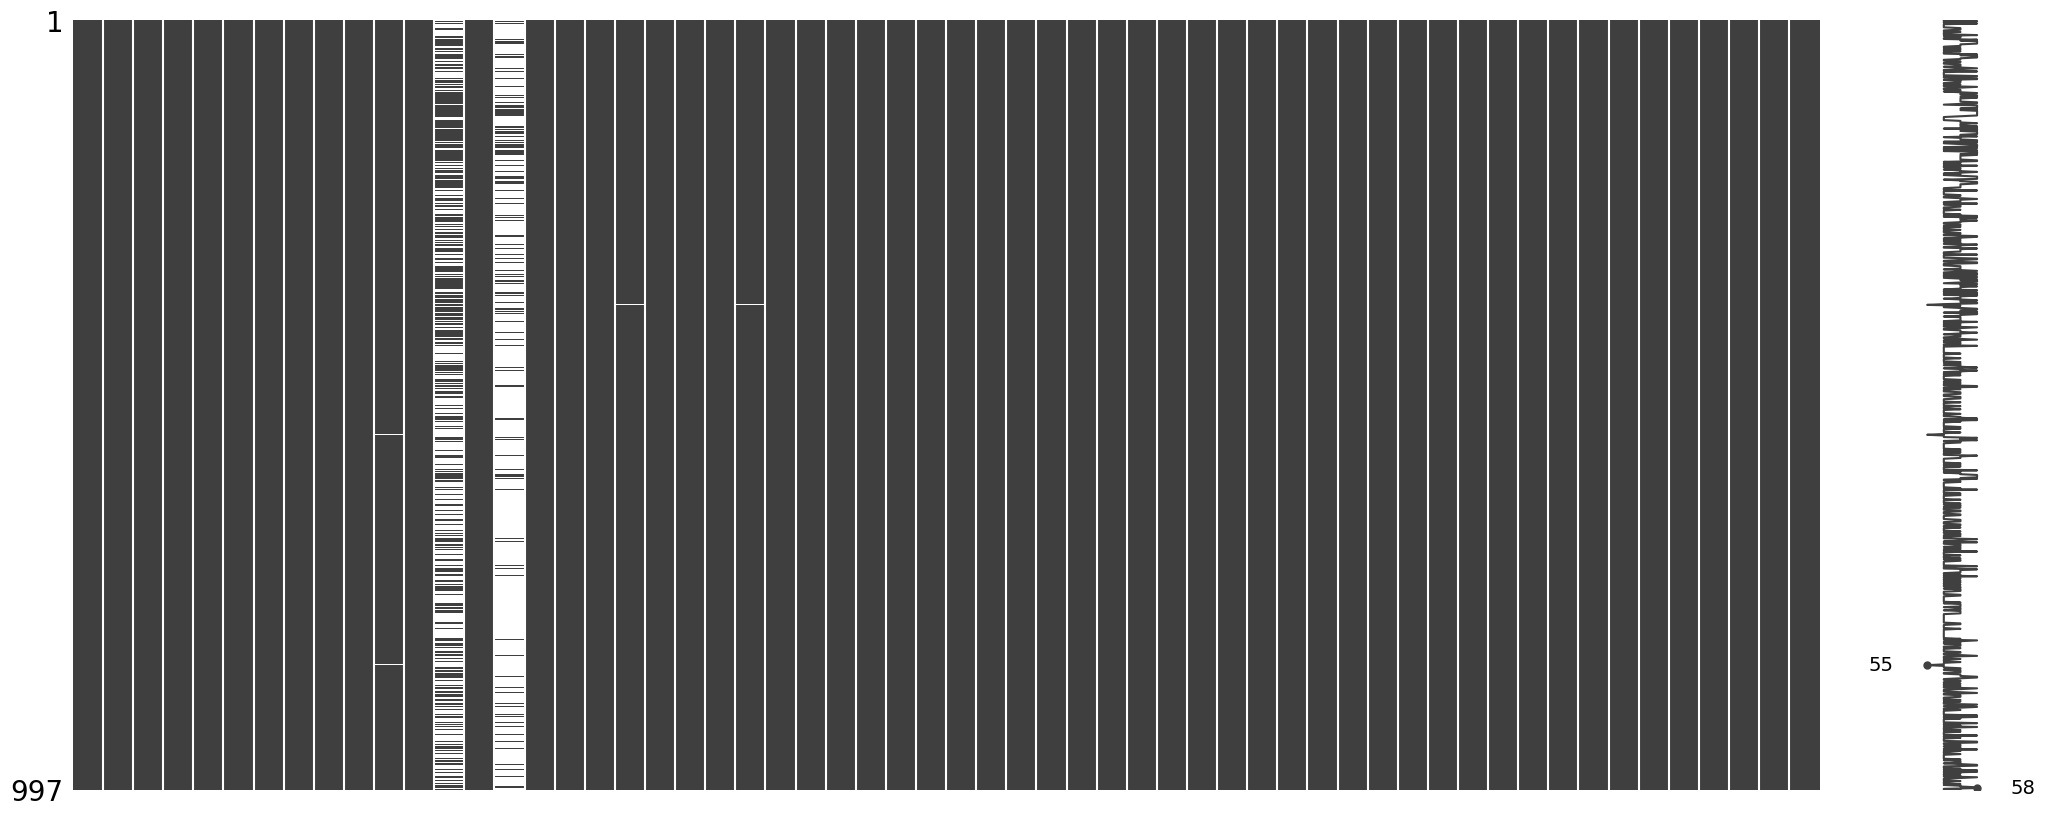

In [ ]:
msn.matrix(new_data)

In [ ]:
for i, row in new_data.iterrows(): #iterrows works on copy of rows
    name_large = row["LargestPropertyUseType"]
    name_second = row["SecondLargestPropertyUseType"]
    name_third = row["ThirdLargestPropertyUseType"]
    if name_large:
        if name_large != "parking":
            #print(row[name_large], row["LargestPropertyUseTypeGFA"]/row["PropertyGFATotal"])
            new_data.at[i, name_large] = row["LargestPropertyUseTypeGFA"]/row["PropertyGFATotal"]
        else:
            new_data.at[i, "parking"] = row["PropertyGFAParking"]/row["PropertyGFATotal"]
    if name_second:
        if name_second != "parking":
            new_data.at[i, name_second] = row["SecondLargestPropertyUseTypeGFA"]/row["PropertyGFATotal"]
        else:
            new_data.at[i, "parking"] = row["PropertyGFAParking"]/row["PropertyGFATotal"]
    if name_third:
        if name_third != "parking":
            new_data.at[i, name_third] = row["ThirdLargestPropertyUseTypeGFA"]/row["PropertyGFATotal"]
        else:
            new_data.at[i, "parking"] = row["PropertyGFAParking"]/row["PropertyGFATotal"]

In [ ]:
new_data= new_data.iloc[:, :-1]
new_data.head()

OSEBuildingID          Address  ZipCode  Latitude  Longitude  \
0              1    405 olive way  98101.0  47.61220 -122.33799   
1              2  724 pine street  98101.0  47.61317 -122.33393   
2              3  1900 5th avenue  98101.0  47.61393 -122.33810   
3              5   620 stewart st  98101.0  47.61412 -122.33664   
4              8    401 lenora st  98121.0  47.61375 -122.34047   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                   88434                  hotel                    88434.0   
1                   88502                  hotel                    83880.0   
2                  759392                  hotel                   756493.0   
3                   61320                  hotel                    61320.0   
4                  113580                  hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              0.0   
1                      parking                          15064.0   
2                          NaN                              0.0   
3                          NaN                              0.0   
4                      parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             0.0   
1               entertainment                          4622.0   
2                         NaN                             0.0   
3                         NaN                             0.0   
4               entertainment                             0.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   TotalGHGEmissions  GHGEmissionsIntensity  harvesine_distance  CatYearCode  \
0             249.98                   2.83            0.496782         10.0   
1             295.86                   2.86            0.488726          2.0   
2            2089.28                   2.19            0.602378          5.0   
3             286.43                   4.67            0.586253         10.0   
4             505.01                   2.88            0.650801          4.0   

   ratioElec  ratioSteam  ratioNaturalGas  campus  nonresidential  \
0   0.546060    0.277302         0.176638       0               1   
1   0.386609    0.000000         0.613391       0               1   
2   0.682307    0.297113         0.020579       0               1   
3   0.407519    0.325913         0.266567       0               1   
4   0.378802    0.000000         0.621198       0               1   

   nonresidential cos  sps-district k-12  ballard  central

In [ ]:
new_data.drop(columns=["LargestPropertyUseTypeGFA","ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA"], inplace=True)

In [ ]:
new_data["percentSurf"] = new_data["PropertyGFABuilding(s)"]/new_data["PropertyGFATotal"]

In [ ]:
new_data.drop(columns=["PropertyGFAParking","PropertyGFABuilding(s)"], inplace=True)
new_data.head()

OSEBuildingID          Address  ZipCode  Latitude  Longitude  \
0              1    405 olive way  98101.0  47.61220 -122.33799   
1              2  724 pine street  98101.0  47.61317 -122.33393   
2              3  1900 5th avenue  98101.0  47.61393 -122.33810   
3              5   620 stewart st  98101.0  47.61412 -122.33664   
4              8    401 lenora st  98121.0  47.61375 -122.34047   

   NumberofBuildings  NumberofFloors  PropertyGFATotal LargestPropertyUseType  \
0                1.0              12             88434                  hotel   
1                1.0              11            103566                  hotel   
2                1.0              41            956110                  hotel   
3                1.0              10             61320                  hotel   
4                1.0              18            175580                  hotel   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              0.0   
1                      parking                          15064.0   
2                          NaN                              0.0   
3                          NaN                              0.0   
4                      parking                          68009.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0             60.0         81.699997           84.300003          182.500000   
1             61.0         94.800003           97.900002          176.100006   
2             43.0         96.000000           97.699997          241.899994   
3             56.0        110.800003          113.300003          216.199997   
4             75.0        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000            7226362.5              7456910.0   
1            179.399994            8387933.0              8664479.0   
2            244.100006           72587024.0             73937112.0   
3            224.000000            6794584.0              6946800.5   
4            215.600006           14172606.0             14656503.0   

   TotalGHGEmissions  GHGEmissionsIntensity  harvesine_distance  CatYearCode  \
0             249.98                   2.83            0.496782         10.0   
1             295.86                   2.86            0.488726          2.0   
2            2089.28                   2.19            0.602378          5.0   
3             286.43                   4.67            0.586253         10.0   
4             505.01                   2.88            0.650801          4.0   

   ratioElec  ratioSteam  ratioNaturalGas  campus  nonresidential  \
0   0.546060    0.277302         0.176638       0               1   
1   0.386609    0.000000         0.613391       0               1   
2   0.682307    0.297113         0.020579       0               1   
3   0.407519    0.325913         0.266567       0               1   
4   0.378802    0.000000         0.621198       0               1   

   nonresidential cos  sps-district k-12  ballard  central  delridge  \
0                   0                  0        0        0         0   
1                   0                  0        0        0         0   
2                   0                  0        0        0         0   
3                   0                  0        0        0         0   
4                   0                  0        0        0         0   

   downtown  east  greater duwamish  lake union  magnolia / queen anne  north  \
0         1     0                 0           0                      0      0   
1         1     0                 0           0                      0      0   
2         1     0                 0           0                      0      0   
3         1     0                 0           0                      0      0   
4         1     0                 0           0                     

In [ ]:
new_data.describe(include="all")

OSEBuildingID            Address       ZipCode    Latitude  \
count      997.000000                997    997.000000  997.000000   
unique            NaN                985           NaN         NaN   
top               NaN  2600 sw barton st           NaN         NaN   
freq              NaN                  4           NaN         NaN   
mean     14794.898696                NaN  98116.753260   47.616508   
std      13388.944438                NaN     18.544782    0.047200   
min          1.000000                NaN  98020.000000   47.509590   
25%        554.000000                NaN  98104.000000   47.589580   
50%      20503.000000                NaN  98109.000000   47.612850   
75%      24244.000000                NaN  98122.000000   47.649120   
max      50081.000000                NaN  98199.000000   47.733870   

         Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count   997.000000         997.000000      997.000000      9.970000e+02   
unique         NaN                NaN             NaN               NaN   
top            NaN                NaN             NaN               NaN   
freq           NaN                NaN             NaN               NaN   
mean   -122.333581           1.022066        5.141424      1.299489e+05   
std       0.022720           0.514366        8.160603      2.121944e+05   
min    -122.411820           0.000000        0.000000      1.630000e+04   
25%    -122.342740           1.000000        1.000000      3.156900e+04   
50%    -122.333390           1.000000        3.000000      5.373000e+04   
75%    -122.324170           1.000000        5.000000      1.268230e+05   
max    -122.262230           9.000000       99.000000      1.952220e+06   

       LargestPropertyUseType SecondLargestPropertyUseType  \
count                     995                          492   
unique                     11                           13   
top                    office                      parking   
freq                      411                          273   
mean                      NaN                          NaN   
std                       NaN                          NaN   
min                       NaN                          NaN   
25%                       NaN                          NaN   
50%                       NaN                          NaN   
75%                       NaN                          NaN   
max                       NaN                          NaN   

        SecondLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                        997.000000       997.000000        997.000000   
unique                              NaN              NaN               NaN   
top                                 NaN              NaN               NaN   
freq                                NaN              NaN               NaN   
mean                       22267.190268        63.635908         68.394183   
std                        57153.040561        28.825309         69.860430   
min                            0.000000         1.000000          2.100000   
25%                            0.000000        44.000000         34.500000   
50%                            0.000000        71.000000         51.700001   
75%                        15523.000000        88.000000         74.800003   
max                       639931.000000       100.000000        834.400024   

        SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count           996.000000          997.000000            997.000000   
unique                 NaN                 NaN                   NaN   
top                    NaN                 NaN                   NaN   
freq                   NaN                 NaN                   NaN   
mean             70.707831          172.008425            174.229388   
std              70.717493          188.697357            188.931266   
min               0.000000            0.000000             -2.100000   
25%     

In [ ]:
new_data.drop(columns=["SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)","SourceEUIWN(kBtu/sf)","SiteEnergyUseWN(kBtu)"], inplace=True)

In [ ]:
new_data.head(5)

OSEBuildingID          Address  ZipCode  Latitude  Longitude  \
0              1    405 olive way  98101.0  47.61220 -122.33799   
1              2  724 pine street  98101.0  47.61317 -122.33393   
2              3  1900 5th avenue  98101.0  47.61393 -122.33810   
3              5   620 stewart st  98101.0  47.61412 -122.33664   
4              8    401 lenora st  98121.0  47.61375 -122.34047   

   NumberofBuildings  NumberofFloors  PropertyGFATotal LargestPropertyUseType  \
0                1.0              12             88434                  hotel   
1                1.0              11            103566                  hotel   
2                1.0              41            956110                  hotel   
3                1.0              10             61320                  hotel   
4                1.0              18            175580                  hotel   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              0.0   
1                      parking                          15064.0   
2                          NaN                              0.0   
3                          NaN                              0.0   
4                      parking                          68009.0   

   ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
0             60.0           84.300003            7226362.5   
1             61.0           97.900002            8387933.0   
2             43.0           97.699997           72587024.0   
3             56.0          113.300003            6794584.0   
4             75.0          118.699997           14172606.0   

   TotalGHGEmissions  GHGEmissionsIntensity  harvesine_distance  CatYearCode  \
0             249.98                   2.83            0.496782         10.0   
1             295.86                   2.86            0.488726          2.0   
2            2089.28                   2.19            0.602378          5.0   
3             286.43                   4.67            0.586253         10.0   
4             505.01                   2.88            0.650801          4.0   

   ratioElec  ratioSteam  ratioNaturalGas  campus  nonresidential  \
0   0.546060    0.277302         0.176638       0               1   
1   0.386609    0.000000         0.613391       0               1   
2   0.682307    0.297113         0.020579       0               1   
3   0.407519    0.325913         0.266567       0               1   
4   0.378802    0.000000         0.621198       0               1   

   nonresidential cos  sps-district k-12  ballard  central  delridge  \
0                   0                  0        0        0         0   
1                   0                  0        0        0         0   
2                   0                  0        0        0         0   
3                   0                  0        0        0         0   
4                   0                  0        0        0         0   

   downtown  east  greater duwamish  lake union  magnolia / queen anne  north  \
0         1     0                 0           0                      0      0   
1         1     0                 0           0                      0      0   
2         1     0                 0           0                      0      0   
3         1     0                 0           0                      0      0   
4         1     0                 0           0                      0      0   

   northeast  northwest  southeast  southwest  education  health     hotel  \
0          0          0          0          0        0.0     0.0  1.000000   
1          0          0          0          0        0.0     0.0  0.809918   
2          0          0          0          0        0.0     0.0  0.791220   
3          0          0          0          0        0.0     0.0  1.000000   
4          0          0          0          0        0.0     0.0  0.703070   

   housing  mall  office  other   parking  pub

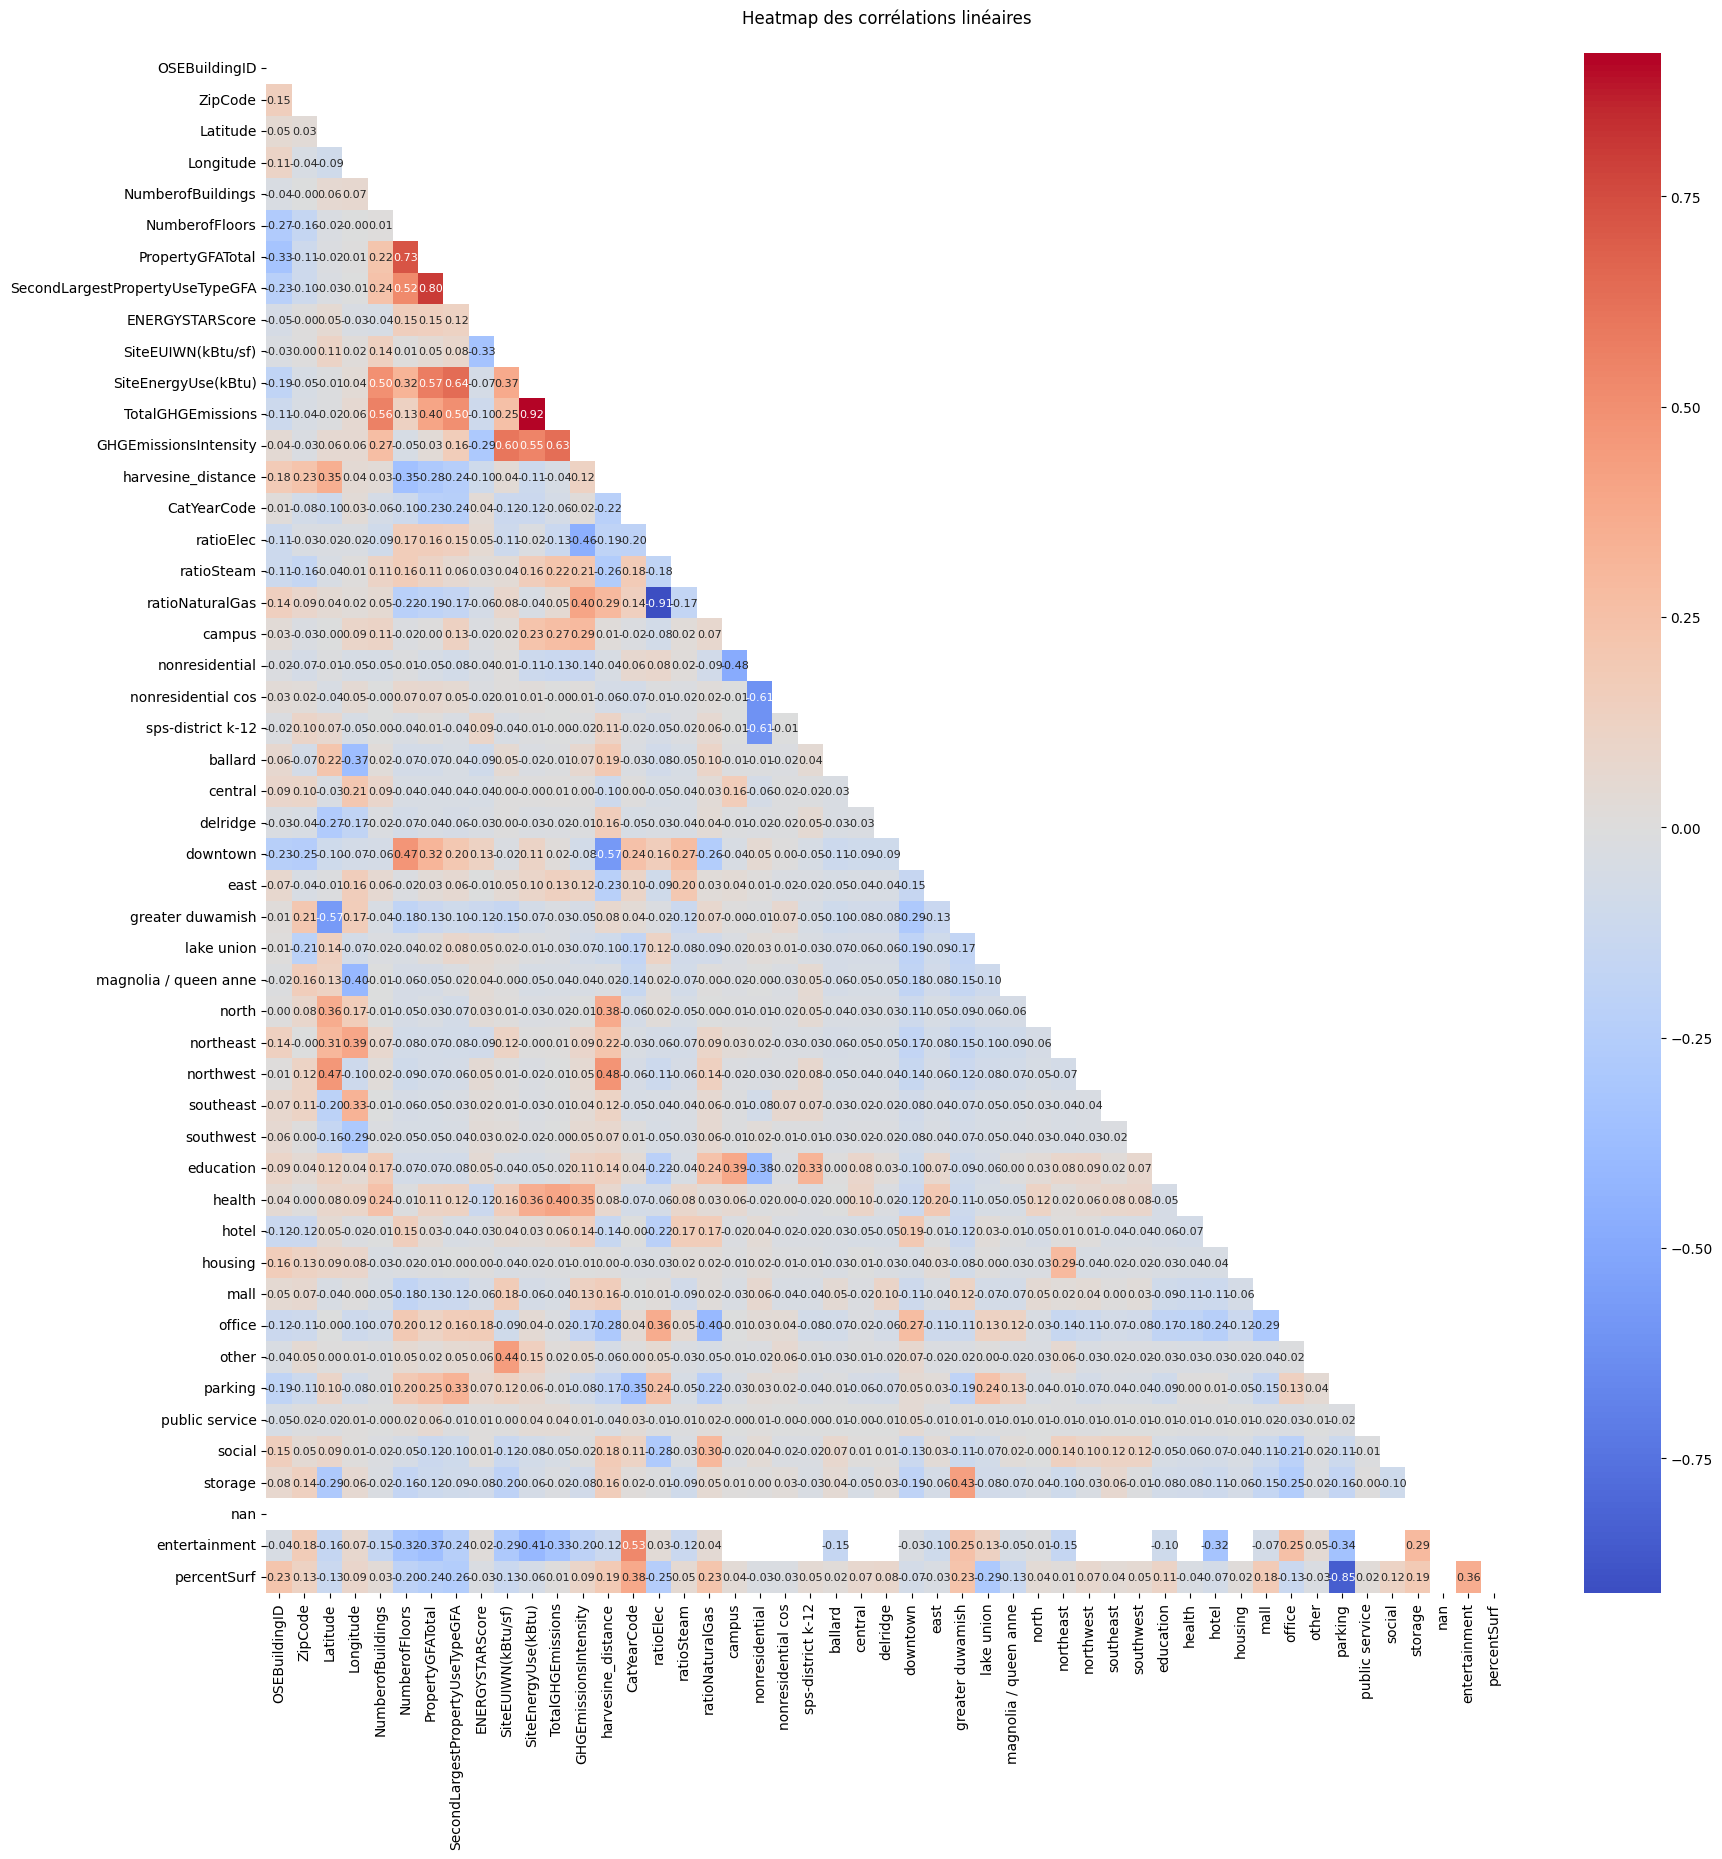

In [ ]:
corr = new_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [ ]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                          level_1  corr_coeff
8  TotalGHGEmissions              SiteEnergyUse(kBtu)    0.920742
6   PropertyGFATotal  SecondLargestPropertyUseTypeGFA    0.800062
4   PropertyGFATotal                   NumberofFloors    0.726304
2            parking                      percentSurf   -0.845307
0    ratioNaturalGas                        ratioElec   -0.909785

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = new_data[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 5]

feature        VIF
0    TotalGHGEmissions   9.242321
1      ratioNaturalGas   8.274032
2          percentSurf  48.871866
3     PropertyGFATotal   6.311432
5  SiteEnergyUse(kBtu)  11.712923
7            ratioElec  33.708492

In [ ]:
new_data.columns


Index([                  'OSEBuildingID',                         'Address',
                               'ZipCode',                        'Latitude',
                             'Longitude',               'NumberofBuildings',
                        'NumberofFloors',                'PropertyGFATotal',
                'LargestPropertyUseType',    'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA',                 'ENERGYSTARScore',
                    'SiteEUIWN(kBtu/sf)',             'SiteEnergyUse(kBtu)',
                     'TotalGHGEmissions',           'GHGEmissionsIntensity',
                    'harvesine_distance',                     'CatYearCode',
                             'ratioElec',                      'ratioSteam',
                       'ratioNaturalGas',                          'campus',
                        'nonresidential',              'nonresidential cos',
                     'sps-district k-12',                         'ballard',

In [ ]:
new_data.drop(['Address','ZipCode','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',np.nan], axis=1 , inplace = True) 

In [ ]:
new_data.shape

(997, 47)

<Axes: >

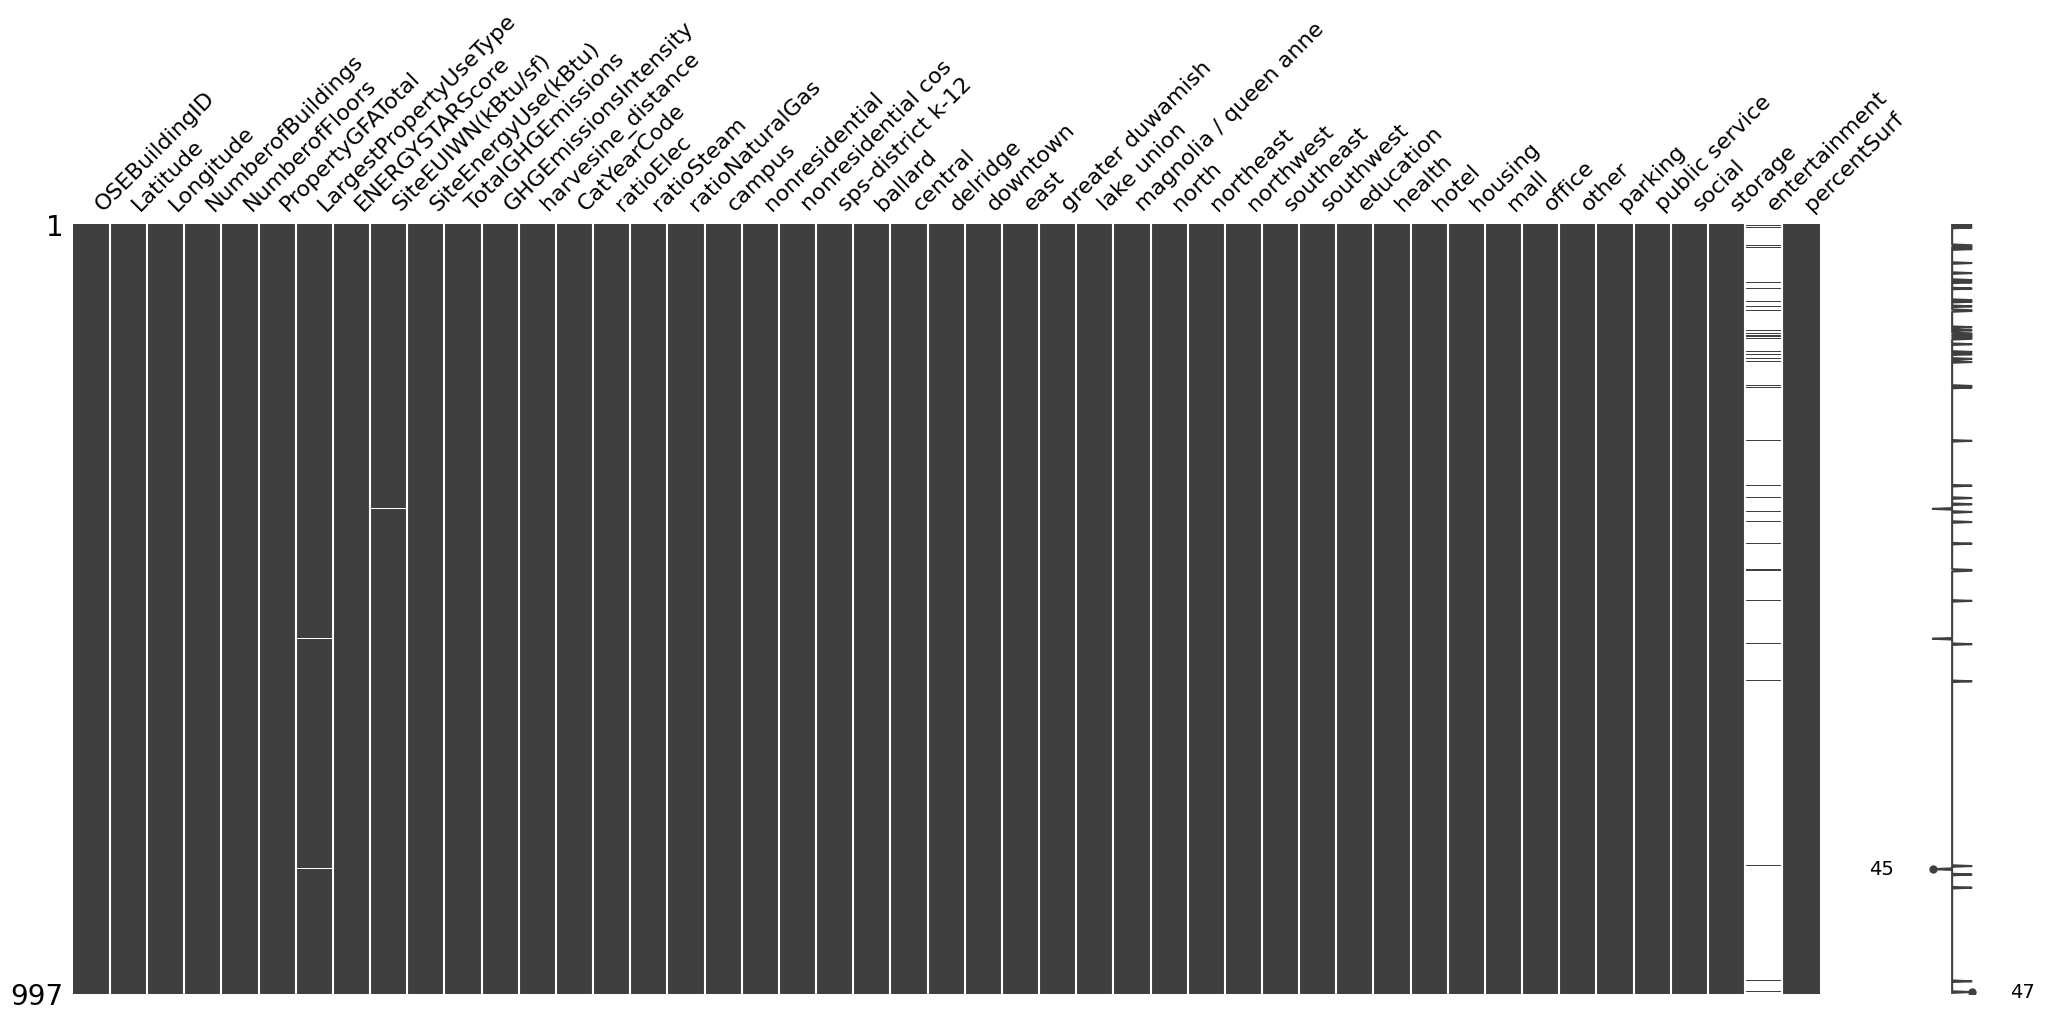

In [ ]:
msn.matrix(new_data)

In [ ]:
#on enregistre ce dataset nettoyé
new_data.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/data_target.csv', index=False)

# **3. Target Features**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/data_target.csv")

## Target1 :    SiteEnergyUse(kBtu)

In [ ]:
data.head()

OSEBuildingID  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0              1  47.61220 -122.33799                1.0              12   
1              2  47.61317 -122.33393                1.0              11   
2              3  47.61393 -122.33810                1.0              41   
3              5  47.61412 -122.33664                1.0              10   
4              8  47.61375 -122.34047                1.0              18   

   PropertyGFATotal LargestPropertyUseType  ENERGYSTARScore  \
0             88434                  hotel             60.0   
1            103566                  hotel             61.0   
2            956110                  hotel             43.0   
3             61320                  hotel             56.0   
4            175580                  hotel             75.0   

   SiteEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
0           84.300003            7226362.5             249.98   
1           97.900002            8387933.0             295.86   
2           97.699997           72587024.0            2089.28   
3          113.300003            6794584.0             286.43   
4          118.699997           14172606.0             505.01   

   GHGEmissionsIntensity  harvesine_distance  CatYearCode  ratioElec  \
0                   2.83            0.496782         10.0   0.546060   
1                   2.86            0.488726          2.0   0.386609   
2                   2.19            0.602378          5.0   0.682307   
3                   4.67            0.586253         10.0   0.407519   
4                   2.88            0.650801          4.0   0.378802   

   ratioSteam  ratioNaturalGas  campus  nonresidential  nonresidential cos  \
0    0.277302         0.176638       0               1                   0   
1    0.000000         0.613391       0               1                   0   
2    0.297113         0.020579       0               1                   0   
3    0.325913         0.266567       0               1                   0   
4    0.000000         0.621198       0               1                   0   

   sps-district k-12  ballard  central  delridge  downtown  east  \
0                  0        0        0         0         1     0   
1                  0        0        0         0         1     0   
2                  0        0        0         0         1     0   
3                  0        0        0         0         1     0   
4                  0        0        0         0         1     0   

   greater duwamish  lake union  magnolia / queen anne  north  northeast  \
0                 0           0                      0      0          0   
1                 0           0                      0      0          0   
2                 0           0                      0      0          0   
3                 0           0                      0      0          0   
4                 0           0                      0      0          0   

   northwest  southeast  southwest  education  health     hotel  housing  \
0          0          0          0        0.0     0.0  1.000000      0.0   
1          0          0          0        0.0     0.0  0.809918      0.0   
2          0          0          0        0.0     0.0  0.791220      0.0   
3          0          0          0        0.0     0.0  1.000000      0.0   
4          0          0          0        0.0     0.0  0.703070      0.0   

   mall  office  other   parking  public service  social  storage  \
0   0.0     0.0    0.0  0.000000             0.0     0.0      0.0   
1   0.0     0.0    0.0  0.145453             0.0     0.0      0.0   
2   0.0     0.0    0.0  0.000000             0.0     0.0      0.0   
3   0.0     0.0    0.0  0.000000             0.0     0.0      0.0   
4   0.0     0.0    0.0  0.353115             0.0     0.0      0.0   

   entertainment  percentSurf  
0            NaN     1.000000  
1       0.044629     0.854547  
2            NaN     0.794252  
3       

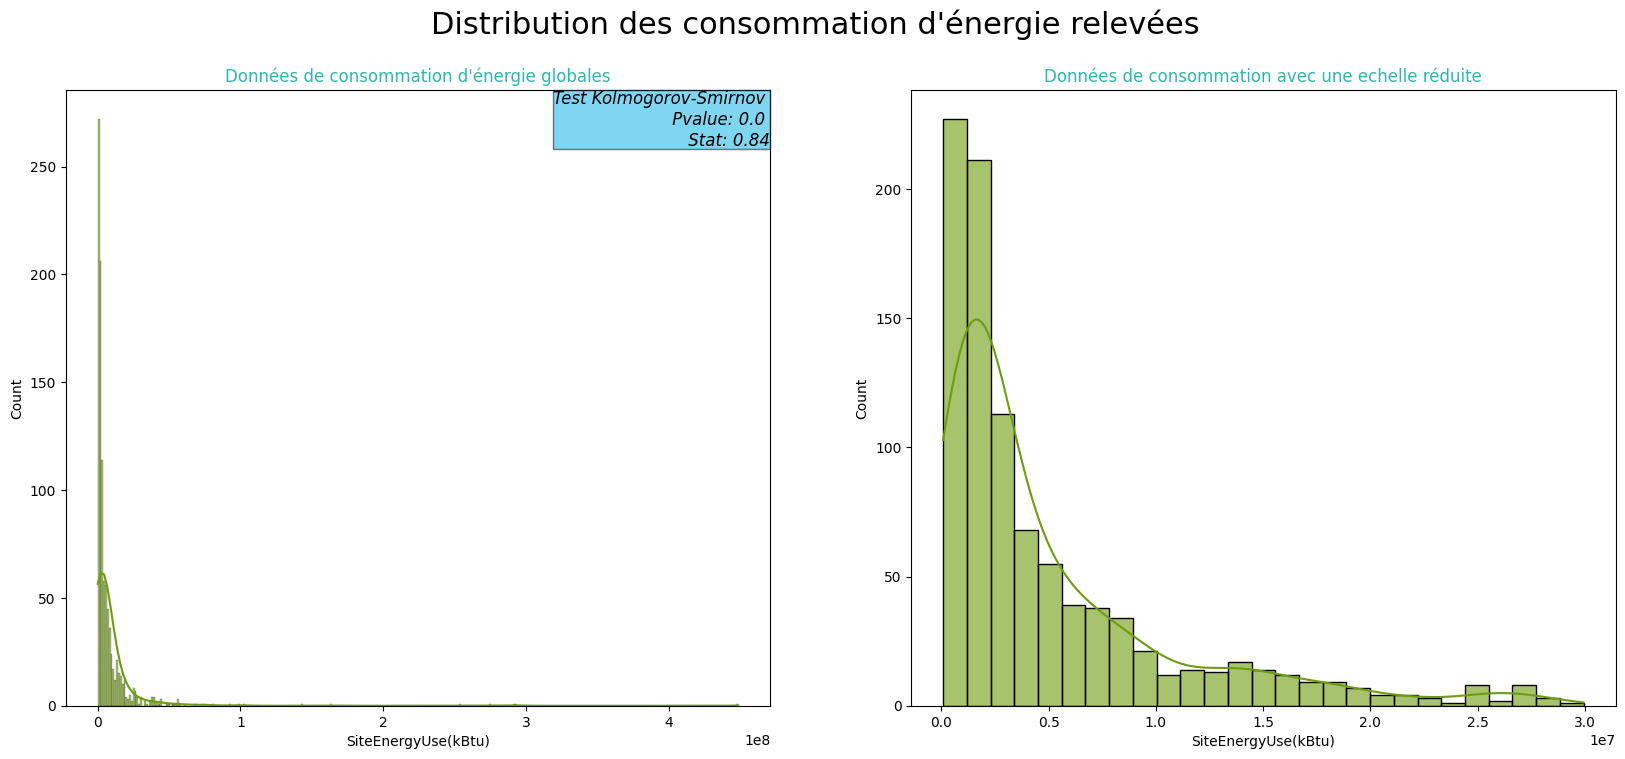

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height


sns.histplot(data=data, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data["SiteEnergyUse(kBtu)"].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data["SiteEnergyUse(kBtu)"]< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Données de consommation avec une echelle réduite", color='#2cb7b0')

plt.suptitle("Distribution des consommation d'énergie relevées",fontsize=22)
plt.show()

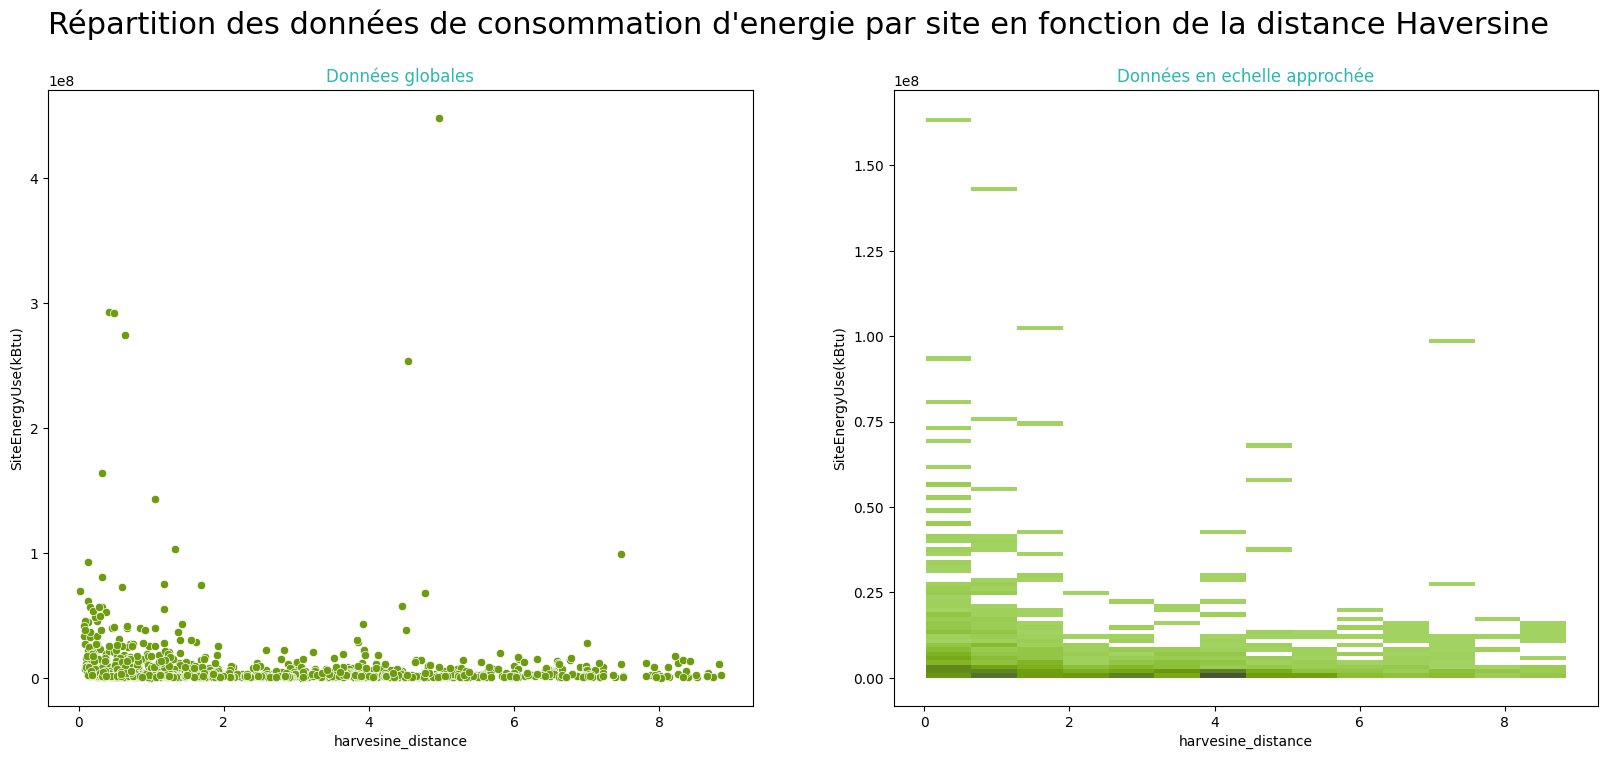

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=data[(data["SiteEnergyUse(kBtu)"] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données en echelle approchée", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'energie par site en fonction de la distance Haversine",  fontsize=22)
plt.show()

<Axes: xlabel='CatYearCode', ylabel='SiteEnergyUse(kBtu)'>

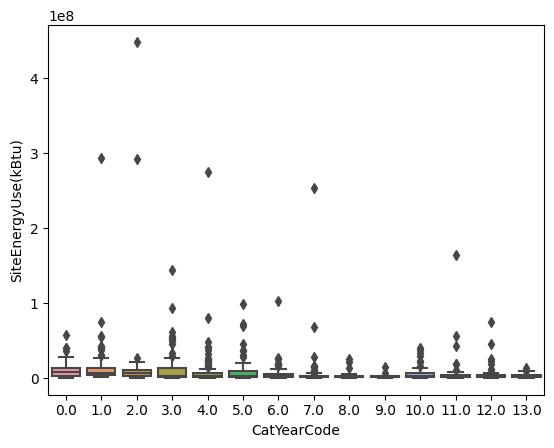

In [ ]:
sns.boxplot(data=data, x='CatYearCode', y='SiteEnergyUse(kBtu)')


## Target 2: TotalGHGEmissions

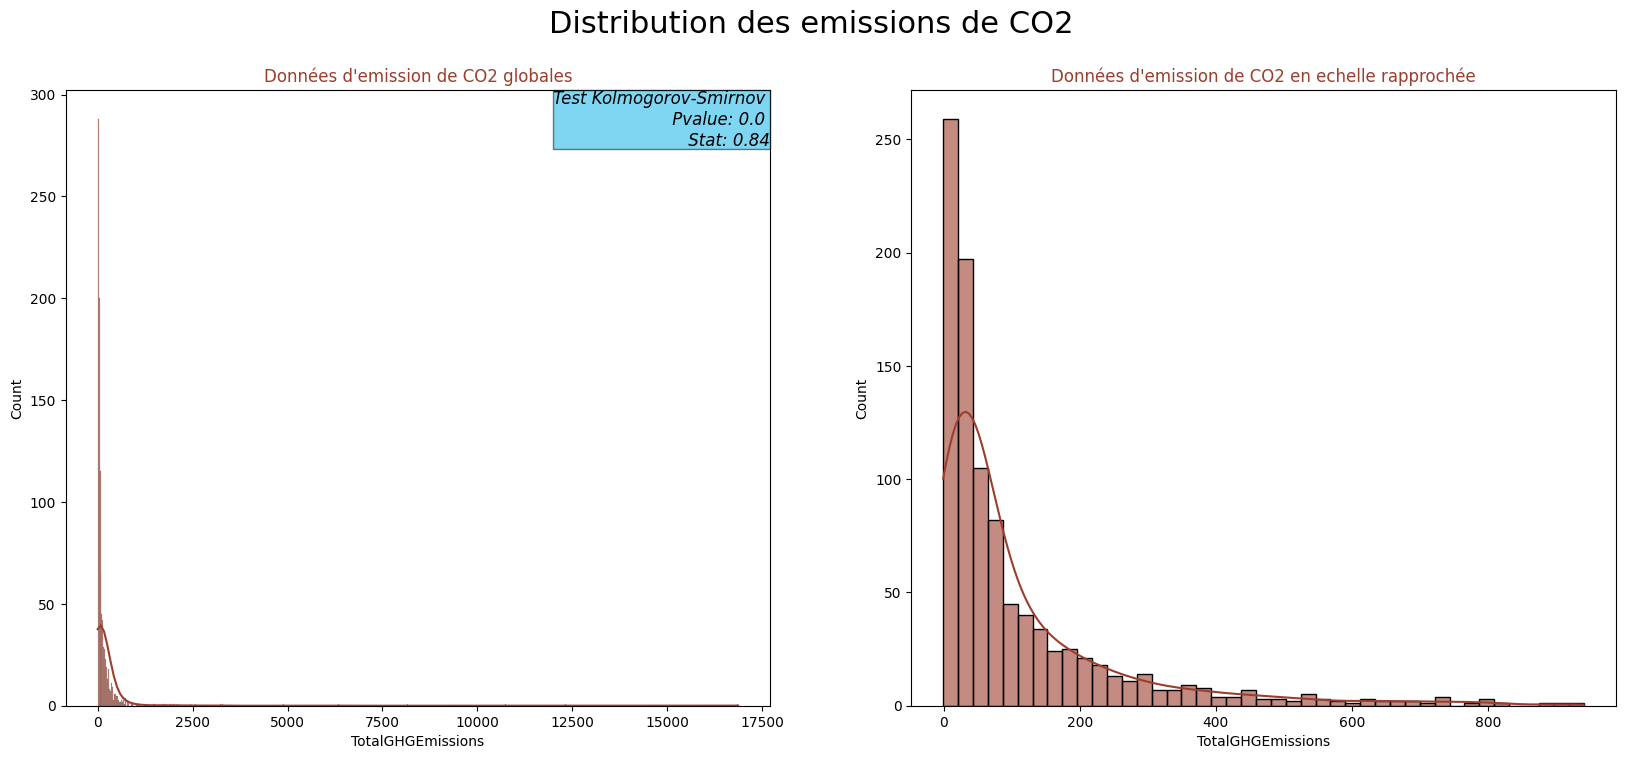

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales", color="#9C3E2D")

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Données d'emission de CO2 en echelle rapprochée", color="#9C3E2D")

plt.suptitle("Distribution des emissions de CO2 ",fontsize=22)
plt.show()

Selon les tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) on peut rejetterl'hypothèse de normalité des distributions de ces variables.

On projette maintenant les distributions de ces 2 variables :

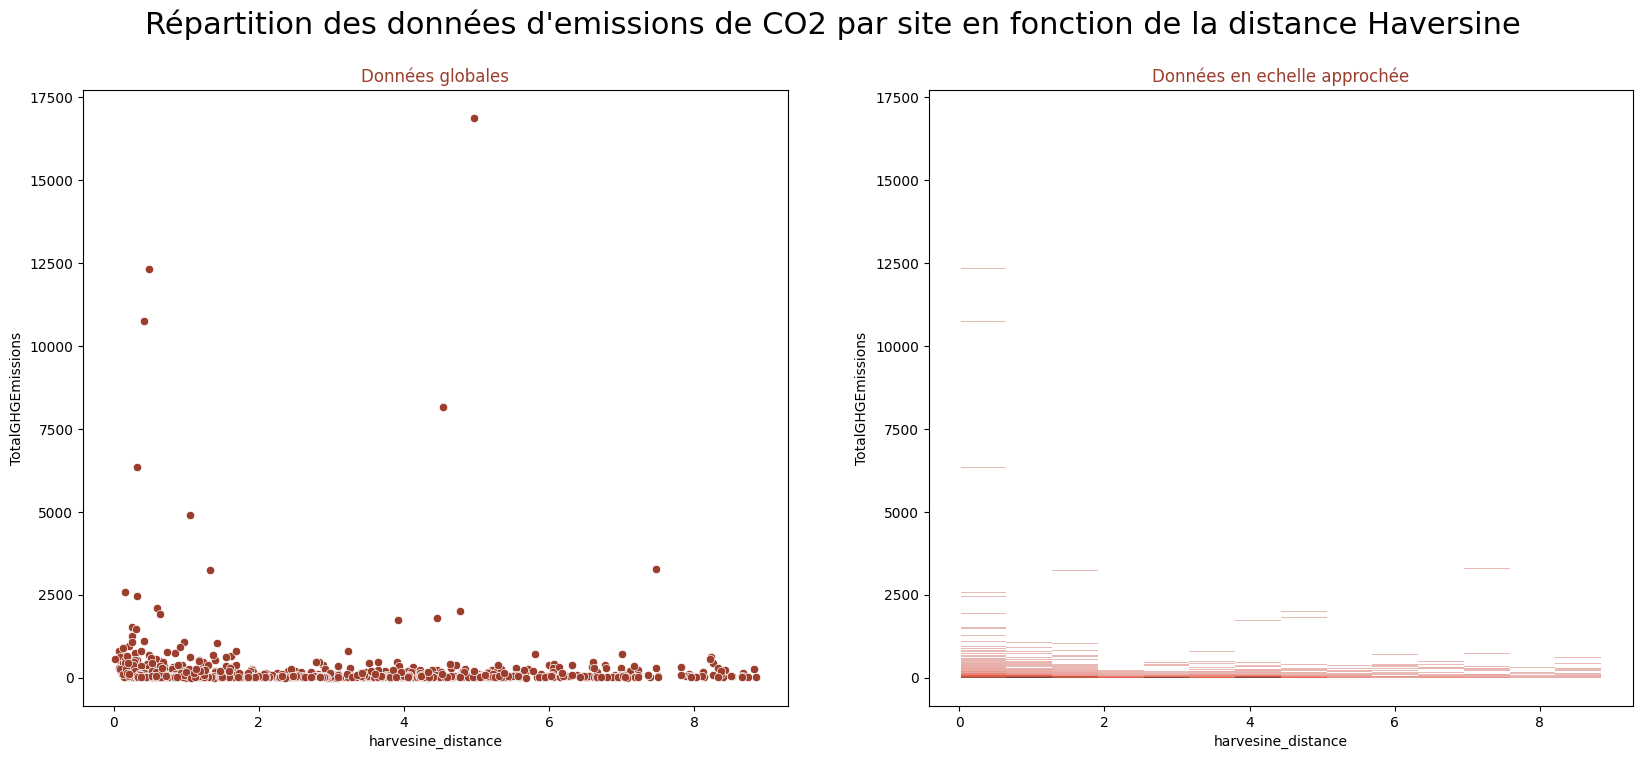

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="TotalGHGEmissions", x="harvesine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales", color="#9C3E2D")
sns.histplot(data=data[(data["TotalGHGEmissions"] < 2*10**8)], y="TotalGHGEmissions", 
                x="harvesine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données en echelle approchée", color="#9C3E2D")
plt.suptitle("Répartition des données d'emissions de CO2 par site en fonction de la distance Haversine",  fontsize=22)
plt.show()

<Axes: xlabel='CatYearCode', ylabel='TotalGHGEmissions'>

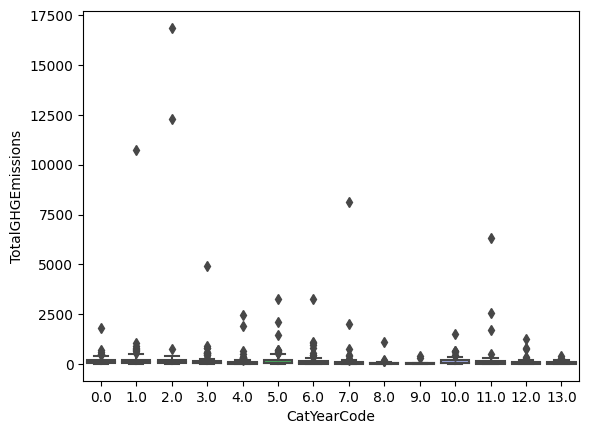

In [ ]:
sns.boxplot(data=data, x='CatYearCode', y="TotalGHGEmissions")

# **4. Conclusion**

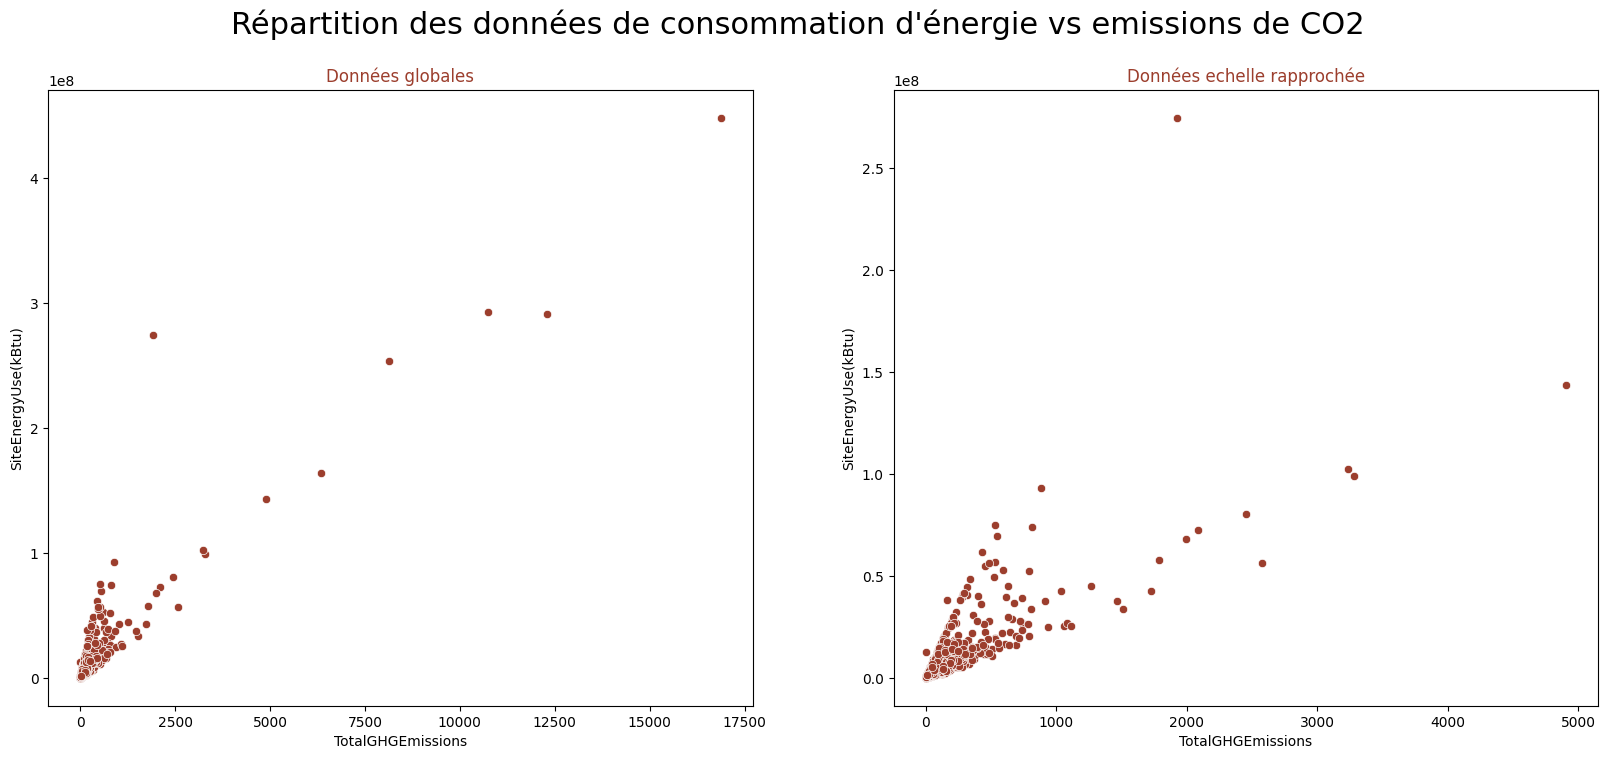

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0],color="#9C3E2D")
axes[0].set_title("Données globales", color="#9C3E2D")
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1],color="#9C3E2D")
axes[1].set_title("Données echelle rapprochée", color="#9C3E2D")
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de CO2", fontsize=22)
plt.show()

On peut dire que les coordonnées géographiques (donc les adresses des bâtiments) ont un impact sur nos deux targets

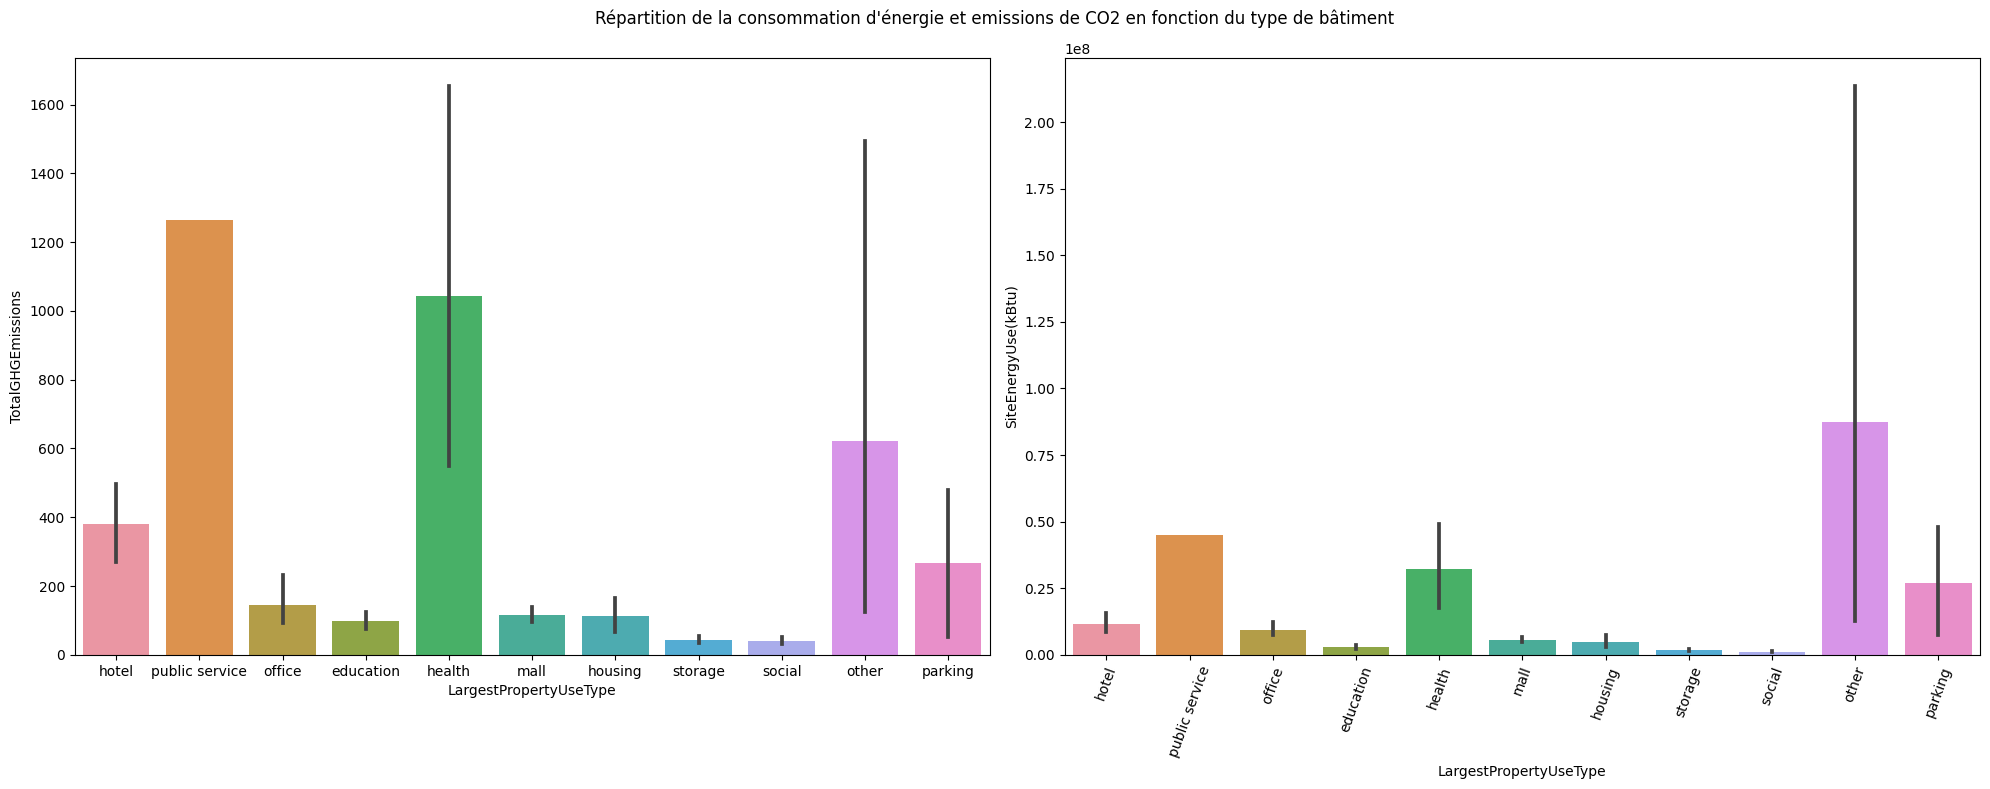

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
plt.xticks(rotation=70)
sns.barplot(x=data['LargestPropertyUseType'],y=data['TotalGHGEmissions'],data=data, ax=axes[0])
sns.barplot(x=data['LargestPropertyUseType' ],y=data['SiteEnergyUse(kBtu)'],data=data, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment",fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data.Latitude, data.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

In [ ]:
data = data.drop(['Latitude', 'Longitude'], axis=1)

<Figure size 1500x1200 with 0 Axes>

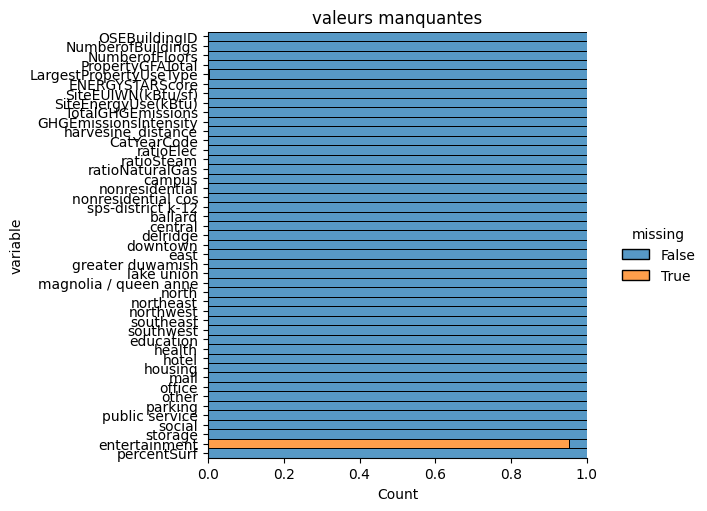

In [ ]:
plt.figure(figsize=(15,12))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('valeurs manquantes')
plt.savefig('valeurs manquantes.png')
plt.show()

In [ ]:
data.entertainment.fillna(0, inplace=True)

In [ ]:
data.shape

(997, 45)

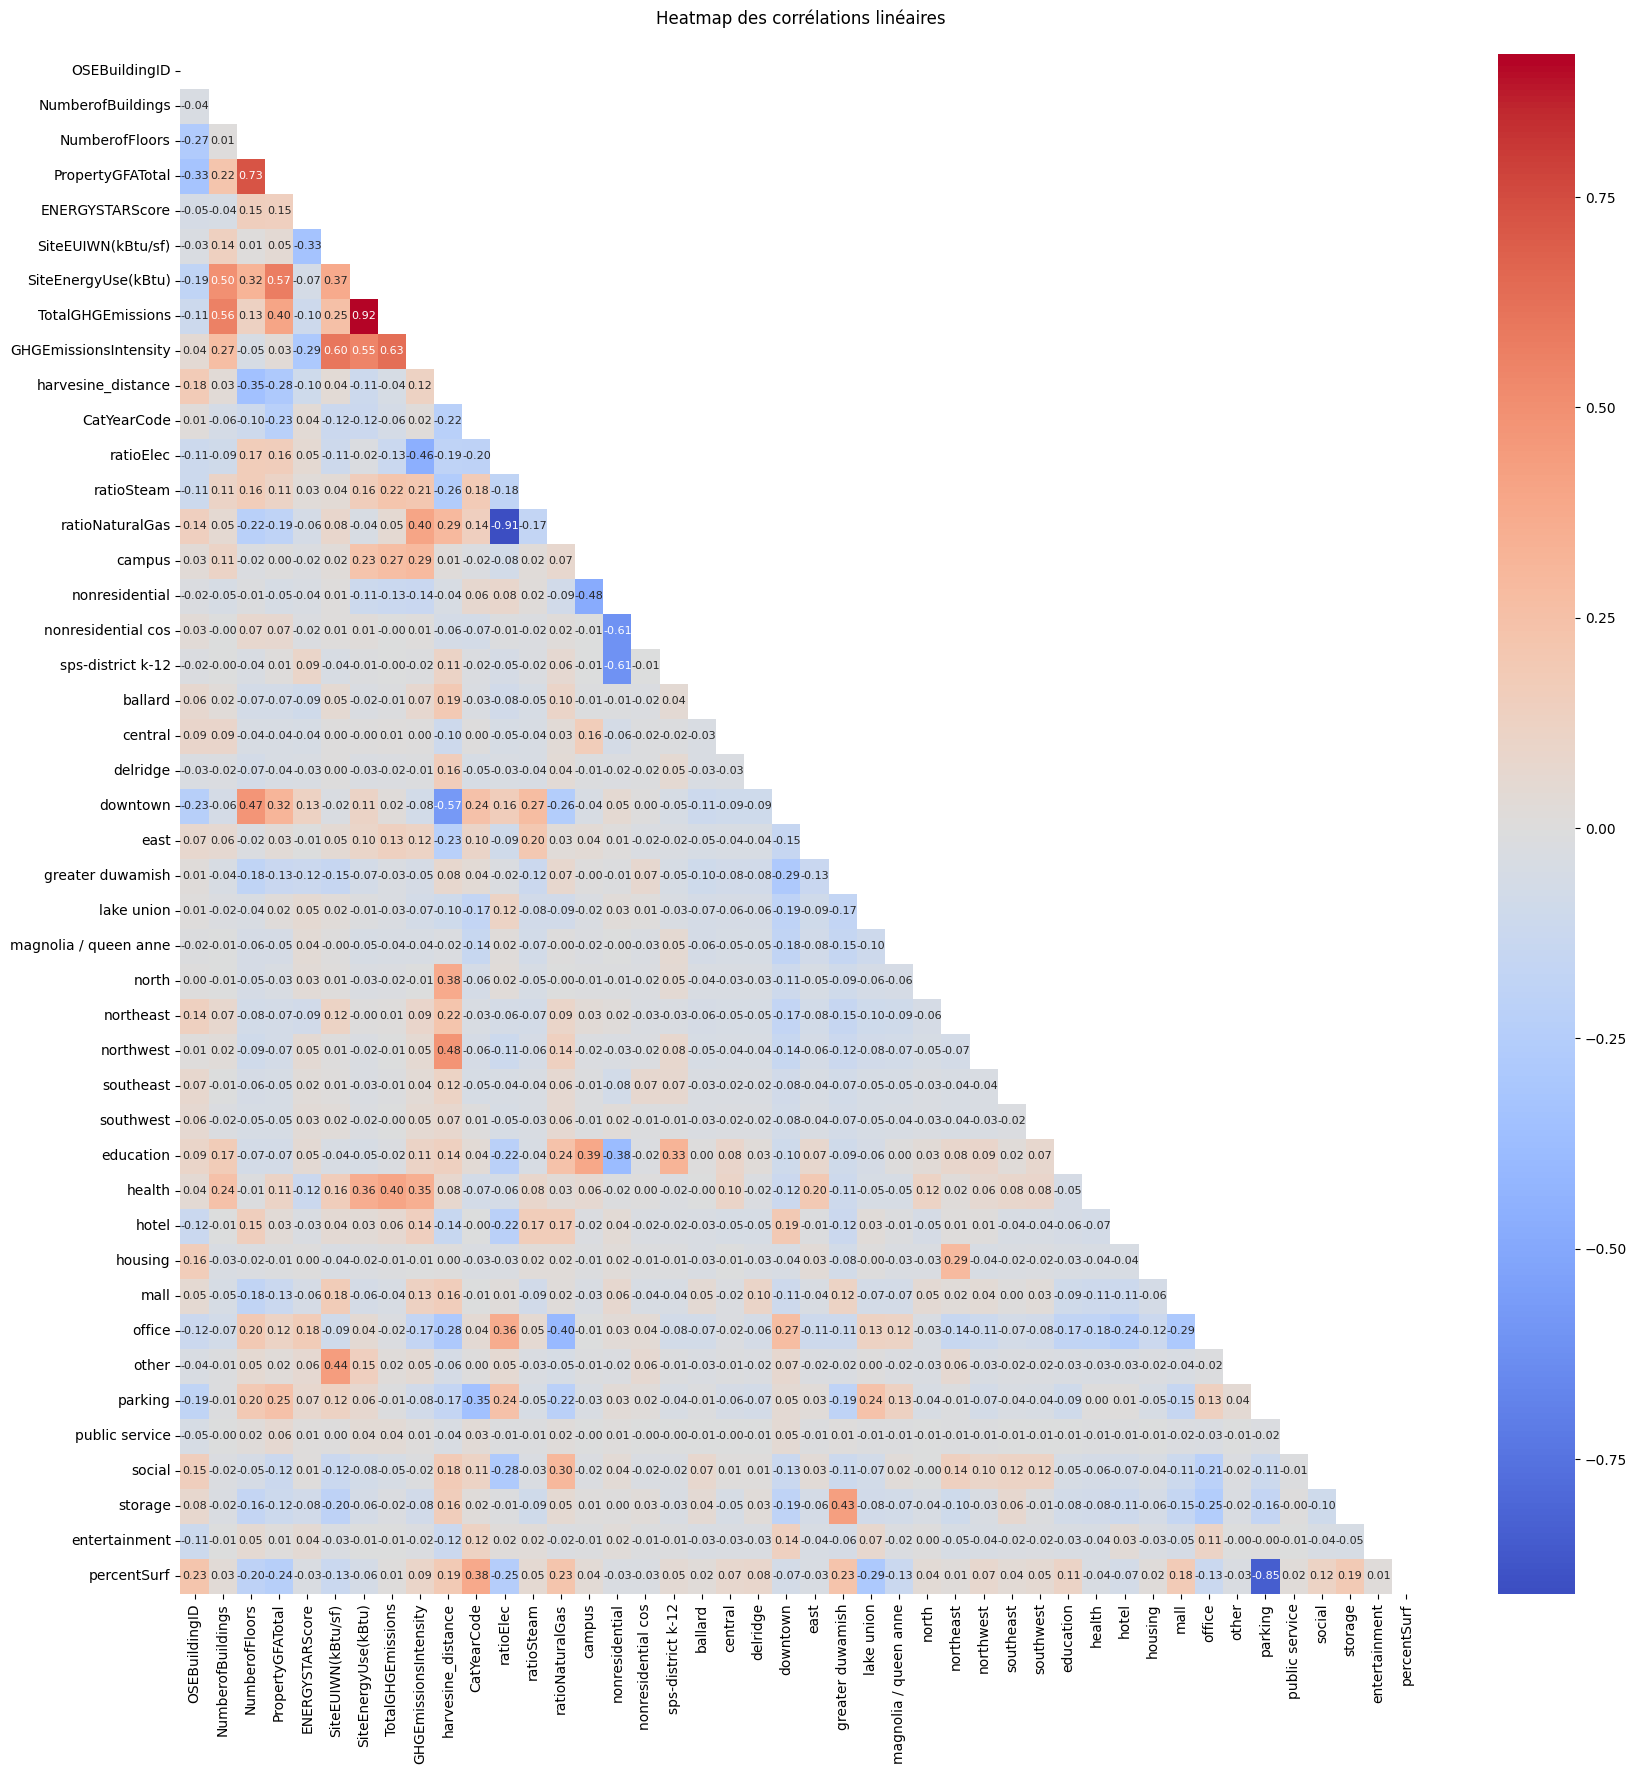

In [ ]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")

plt.show()

<Axes: >

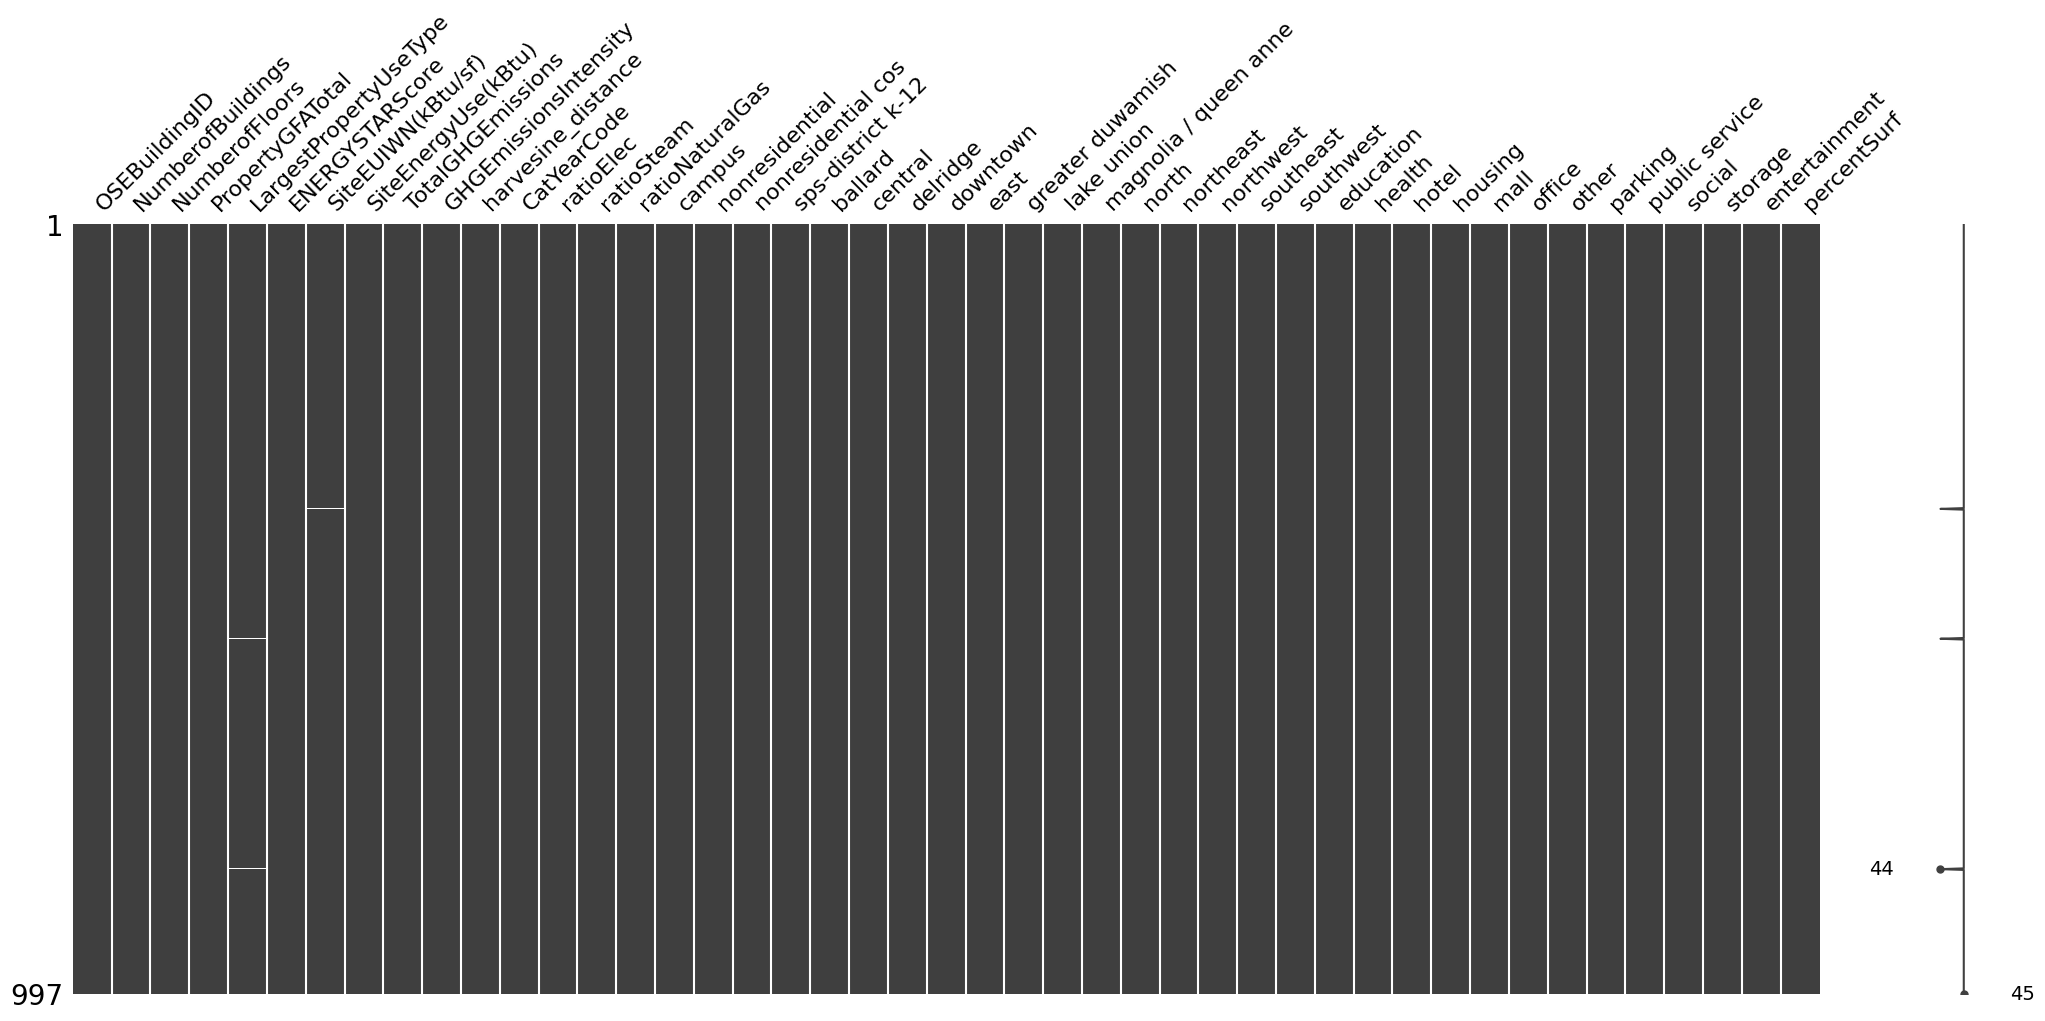

In [ ]:
msn.matrix(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           997 non-null    int64  
 1   NumberofBuildings       997 non-null    float64
 2   NumberofFloors          997 non-null    int64  
 3   PropertyGFATotal        997 non-null    int64  
 4   LargestPropertyUseType  995 non-null    object 
 5   ENERGYSTARScore         997 non-null    float64
 6   SiteEUIWN(kBtu/sf)      996 non-null    float64
 7   SiteEnergyUse(kBtu)     997 non-null    float64
 8   TotalGHGEmissions       997 non-null    float64
 9   GHGEmissionsIntensity   997 non-null    float64
 10  harvesine_distance      997 non-null    float64
 11  CatYearCode             997 non-null    float64
 12  ratioElec               997 non-null    float64
 13  ratioSteam              997 non-null    float64
 14  ratioNaturalGas         997 non-null    fl

In [ ]:
data.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/cleaned_data.csv', index=False)